# packages

In [1]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("pandas")
install("numpy")
install("matplotlib")

In [16]:
destination_folder = './target/img/scatter/'
fileformat = ".pdf"
input_json = "./target/json/data_consolidated_semistructured.json"

In [3]:
figwidth = 12
figheight = 8
barlabelsize = 18
fig_color = "0.8"

# imports

In [4]:
import pandas as pd
import numpy as np
import json
import csv
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from textwrap import wrap


In [5]:
params = {'legend.fontsize': 'x-large',
        'axes.labelsize':'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large',
        'font.size': 13}
for key in params:
        plt.rcParams[key] = params[key]

# Read data variable from csv

In [9]:
df = pd.read_csv(filepath_or_buffer="./data/04 extraction consolidation results.csv", sep="|")
result = df['Title'].to_list()
result = list(dict.fromkeys(result))
titles = list(df.columns)
metadata = pd.read_csv("./data/search_results.csv", sep=";", encoding="latin-1")
metadata = metadata.drop_duplicates(subset=['Title'])
data = df.merge(metadata, how='left', on='Title')
yeardata = data.drop_duplicates('Title')
yeardata = yeardata[yeardata['Title'].notna()]
yeardata = yeardata.reset_index()

del metadata
del df
del titles

In [10]:
df2 = pd.read_csv("./data/04 extraction consolidation results.csv", sep="|")

In [11]:
yearless = {'A digital twin-driven hybrid approach for the prediction of performance degradation in transmission unit of CNC machine tool':2022,
'A framework for Model-Driven Engineering of resilient software-controlled systems':2021,
'A framework for Model-Driven Engineering of resilient software-controlled systems':2021,
'A Methodology for Digital Twin Modeling and Deployment for Industry 4.0':2020,
'AML4DT: A Model-Driven Framework for Developing and Maintaining Digital Twins with AutomationML':2021,
'Closed-Loop Systems Engineering (CLOSE): Integrating Experimentable Digital Twins with the Model-Driven Engineering Process':2018,
'Combining Low-Code Programming and SDL-Based Modeling with Snap! in the Industry 4.0 Context':2021,
'DataTime: a Framework to smoothly Integrate Past, Present and Future into Models':2021,
'Digital Behavioral Twins for Safe Connected Cars':2018,
'Digital Twin of an Electrical Motor Based on Empirical Performance Model':2020,
'Ensuring consistency in scalable-detail models for DT-based control':2021,
'Generating customized low-code development platforms for digital twins':2022,
'Generative and Model-driven SDK development for the Industrie 4.0 Digital Twin':2021,
'Interface Development for Digital Twin of an Electric Motor Based on Empirical Performance Model':2022,
'Knowledge driven rapid development of white box digital twins for industrial plant systems':2021,
'Meta-model-based shop-floor digital twin architecture, modeling and application':2023,
'Model-Driven Development of a Digital Twin for Injection Molding':2020,
'Model-driven engineering city spaces via bidirectional model transformations':2021,
'Supporting Digital Twins for the Retrofit in Aviation by a Model-Driven Data Handling':2023,
'Supporting the Implementation of Digital Twins for IoT-Enhanced BPs':2023,
'The Framework for Designing Autonomous Cyber-Physical Multi-agent Systems for Adaptive Resource Management':2019,
'The OMiLAB Digital Innovation environment: Agile conceptual models to bridge business value with Digital and Physical Twins for Product-Service Systems development':2022,
'Towards a Model-Driven Architecture for Interactive Digital Twin Cockpits':2020,
'Using UML and OCL Models to Realize High-Level Digital Twins':2021,

'Towards Generating Model-Driven Speech Interfaces for Digital Twins':2023,
'Survey and Practice on Architecture and Deployment Method of Digital Twin System for Intelligent Substation':2023,
'Supporting the Development of Digital Twins in Nuclear Waste Monitoring Systems':2023,
'Supporting Digital Twins Systems Integrating the MERODE Approach':2023,
'Modeling Urban Digital Twins over the Cloud-to-Thing Continuum':2023,
'Model-based digital twins of medicine dispensers for healthcare IoT applications':2023,
'Generation of Digital Twins for Information Exchange Between Partners in the Industrie 4.0 Value Chain':2023,
'Extracting Hardware Reconfiguration Models based on Knowledge Synthesis from STEP Files':2023,
'Explaining Cyberphysical System Behavior With Digital Twins':2023,
'Empowering Industry 4.0 with Generative and Model-Driven SDK Development':2023,
'Digital twin model-driven capacity evaluation and scheduling optimization for ship welding production line':2023,
'An enhanced state-aware model learning approach for security analysis in lightweight protocol implementations':2023,
'AC-ROS: Assurance case driven adaptation for the robot operating system':2020,
'A Modeling Approach Supporting Digital Twin Engineering: Optimizing the Energy Consumption of Air Conditioning Facilities':2023,
'A Model-Driven Digital Twin for Manufacturing Process Adaptation':2023,
'A Model Based Framework for IoT-Aware Business Process Management':2023

}

In [12]:
for index, row in yeardata.iterrows():
    if pd.isna(row['Publication Year']):

        print()
    if row['Title'] in yearless.keys():
        if pd.isna(row['Publication Year']):
            yeardata.at[index, 'Publication Year'] = yearless[row['Title']]
    else:
        if pd.notna(row['Title']) and pd.isna(row['Publication Year']):
            print(row['Title'])


In [13]:
data.columns

Index(['ID', 'Title', 'model processing technique', 'source',
       'source category', 'source sub-category 1', 'source sub-category 2',
       'source model target category', 'target', 'target category',
       'target sub-category 1', 'target sub-category 2',
       'target model target category', 'Technological Readiness Level',
       'system lifecycle phase', 'twinning target', 'twin lifecycle phase',
       'use case domain', 'Use Case', 'Publication Title', 'Authors',
       'Publication Year', 'Document Identifier', 'Publisher'],
      dtype='object')

In [14]:
data = data[data['Title'].notna()]

data.head()

# Create Individual Barcharts

5    2018
4    2019
3    2020
2    2021
1    2022
0    2023
Name: entry, dtype: object : 5     2
4     2
3     9
2    12
1    17
0    21
Name: count, dtype: int64


C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_13728\835670135.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([0,2018,2019,2020,2021,2022,2023], rotation=90)


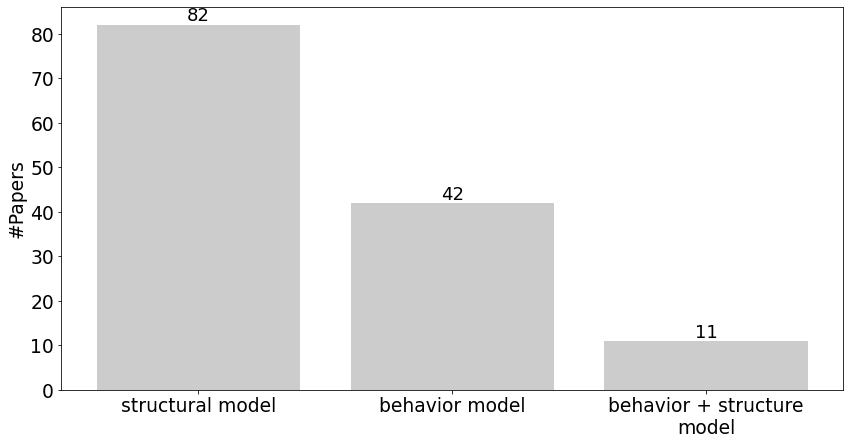

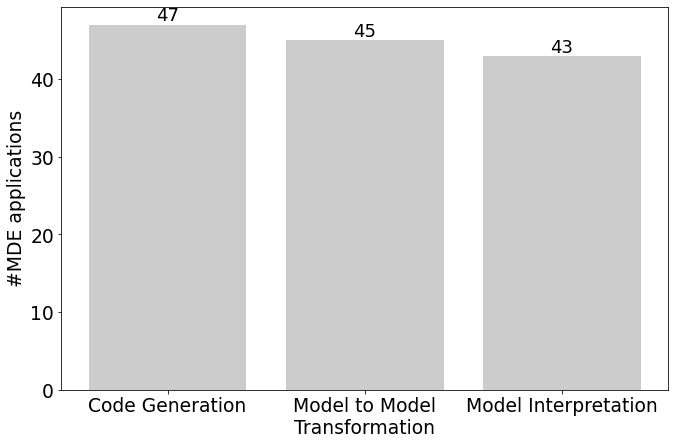

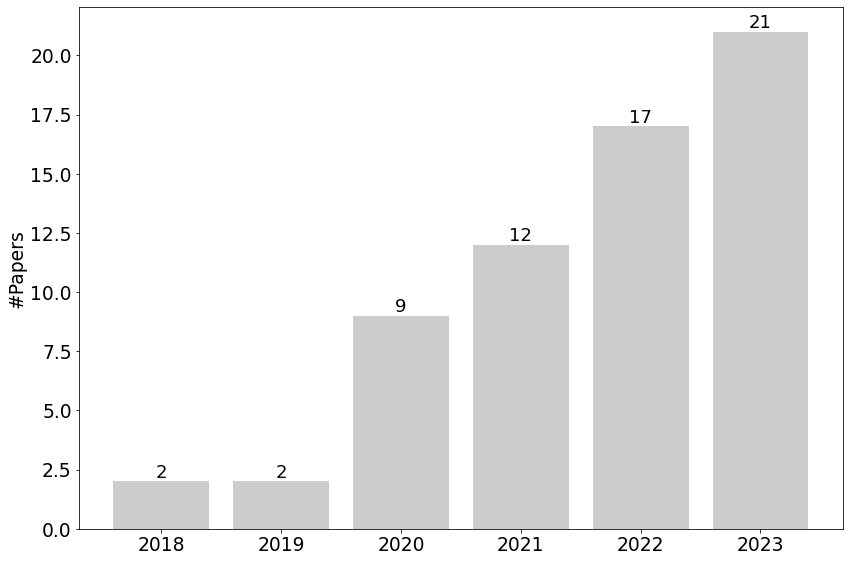

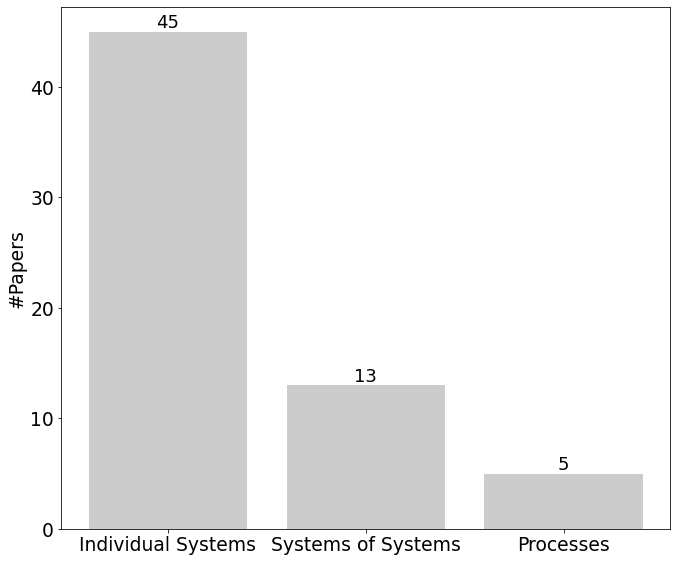

In [17]:
modeling_language = data["source category"].value_counts().reset_index()
modeling_language.columns = ['entry', 'count']
modeling_language  = modeling_language[modeling_language['count'] > 1]
mde_technique= data["model processing technique"].value_counts().reset_index()
mde_technique.columns = ['entry', 'count']
use_case_domain = data["use case domain"].value_counts().reset_index()
use_case_domain.columns = ['entry', 'count']
system_lcp = data["system lifecycle phase"].value_counts().reset_index()
system_lcp.columns = ['entry', 'count']
twinning_target = data["twinning target"].value_counts().reset_index()
twinning_target.columns = ['entry', 'count']
twin_lcp= data["twin lifecycle phase"].value_counts().reset_index()
twin_lcp.columns = ['entry', 'count']
trl = data["Technological Readiness Level"].value_counts().reset_index()
trl.columns = ['entry', 'count']


yeardata = yeardata.fillna(value={'Publication Year':"0"})
years = yeardata["Publication Year"].value_counts().reset_index()
years.columns = ['entry', 'count']
years['entry'] = years['entry'].astype(int).astype(str)
years['entry'].replace('0', "NAN")

tt = data["twinning target"].value_counts().reset_index()
tt.columns = ['entry', 'count']

fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight*0.8)
# List of DataFrames
dataframes = [modeling_language, mde_technique, years, tt]
# Titles for each subplot (modify as needed)
titles = ['#Papers per Modeling Language', '#Papers per MDE technique', '#Papers per year', '#Papers per twinning target']

# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'], color=fig_color)  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[0])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")

# Adjust the layout to avoid overlapping titles

#plt.show()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"MDE_Lang_barchart"+ fileformat)

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figheight*0.8)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[1]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'], color=fig_color)  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[1])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#MDE applications")
#plt.show()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"MDE_barchart"+ fileformat)


fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[2]
plot_data.sort_values('entry', inplace=True)
for index, row in plot_data.iterrows():
    val = int(row['entry'])
    cou = row['count']
#    if val < 2023:
    axes.bar(val, cou,color=fig_color)
#    else:
#        axes.bar(val, cou, fill=False, hatch='///')

#fill=False, hatch='///'

  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
print(plot_data['entry'], ":", plot_data['count'])
axes.set_ylabel("#Papers")
#axes.set_title(titles[2])
#entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels([0,2018,2019,2020,2021,2022,2023], rotation=90)
for container in axes.containers:
    axes.bar_label(container, fontsize=barlabelsize)


# Adjust the layout to avoid overlapping titles
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"Year_barchart"+ fileformat)

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figheight)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[3]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'], color=fig_color)  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[3])
#entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"TT_barchart"+ fileformat)


In [18]:
# List of DataFrames
dataframes = [use_case_domain, system_lcp, twinning_target, twin_lcp, trl]
# Titles for each subplot (modify as needed)
titles = ['#Papers per Use Case Domain', '#Papers per System LCP', '#Papers per Twinning Target', '#Papers per Twin LCP', '#Papers per TRL']


In [19]:
import re

C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_13728\780208155.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=90)


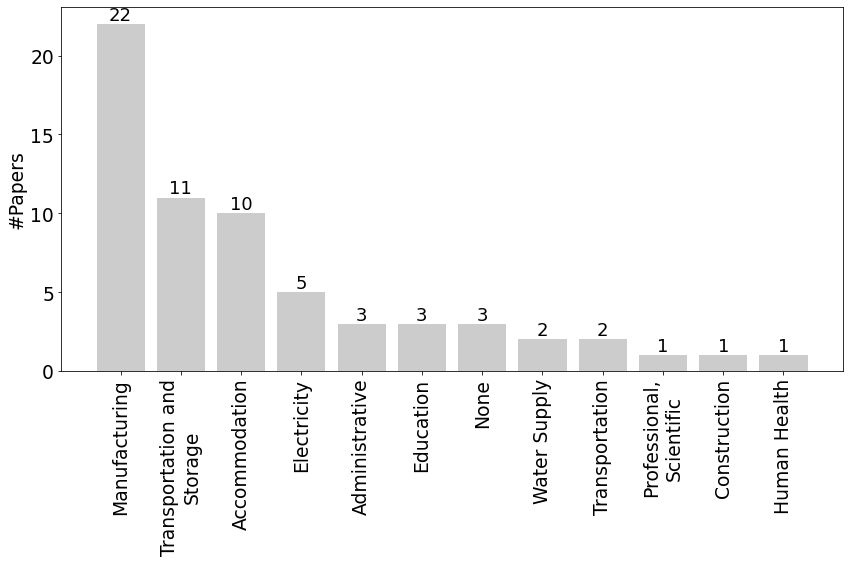

In [20]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
plot_data = dataframes[0]

entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.bar(entry_data, plot_data['count'], color=fig_color)  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[0])
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")
plt.tight_layout()
plt.savefig(destination_folder+"domain_barchart"+ fileformat)

As-Designed
As-Operated


C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_13728\3983728193.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=0)


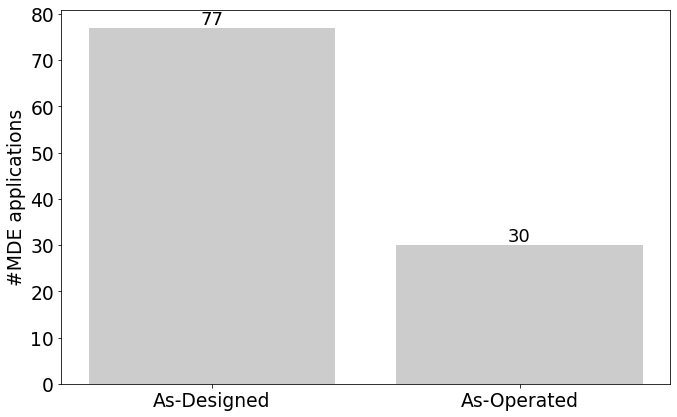

In [21]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.5)
plot_data = dataframes[3]#.groupby(['entry']).filter(lambda x: len(x)>1)

for index, row in plot_data.iterrows():
    if ";" in row['entry']:
        values = row['entry'].split(";")
        for val in values:
            for index2, row2 in plot_data.iterrows():
                if row2['entry'] == val:
                    #change value by +1
                    print(row2['entry'])
                    plot_data.loc[plot_data['entry'].isin([row2['entry']]), 'count']+=1
        plot_data.drop(index, inplace=True)

axes.bar(plot_data['entry'], plot_data['count'], color=fig_color)  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[3])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=0)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#MDE applications")
plt.tight_layout()
plt.savefig(destination_folder+"TLCP_barchart"+ fileformat)

C:\Users\Daniel Lehner\AppData\Local\Temp\ipykernel_13728\460116121.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(plot_data['entry'], rotation=0)


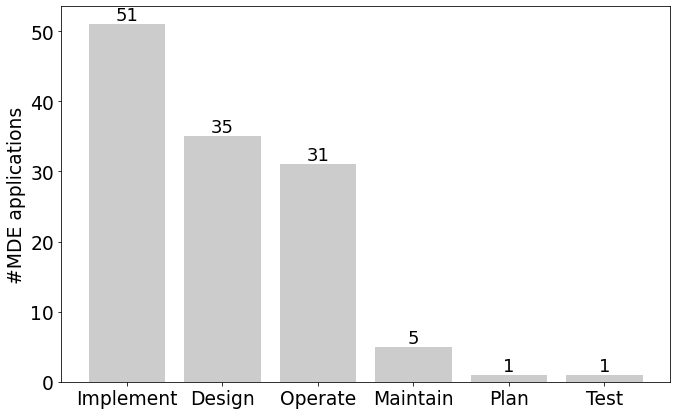

In [22]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.5)
plot_data = dataframes[1]
plot_data = plot_data#[plot_data['count'] > 2] 
axes.bar(plot_data['entry'], plot_data['count'], color=fig_color)  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[1])
axes.set_xticklabels(plot_data['entry'], rotation=0)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#MDE applications")
plt.tight_layout()
plt.savefig(destination_folder+"SLCP_barchart"+ fileformat)

C:\Users\ac130903\AppData\Local\Temp\ipykernel_11764\1997314300.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=0)


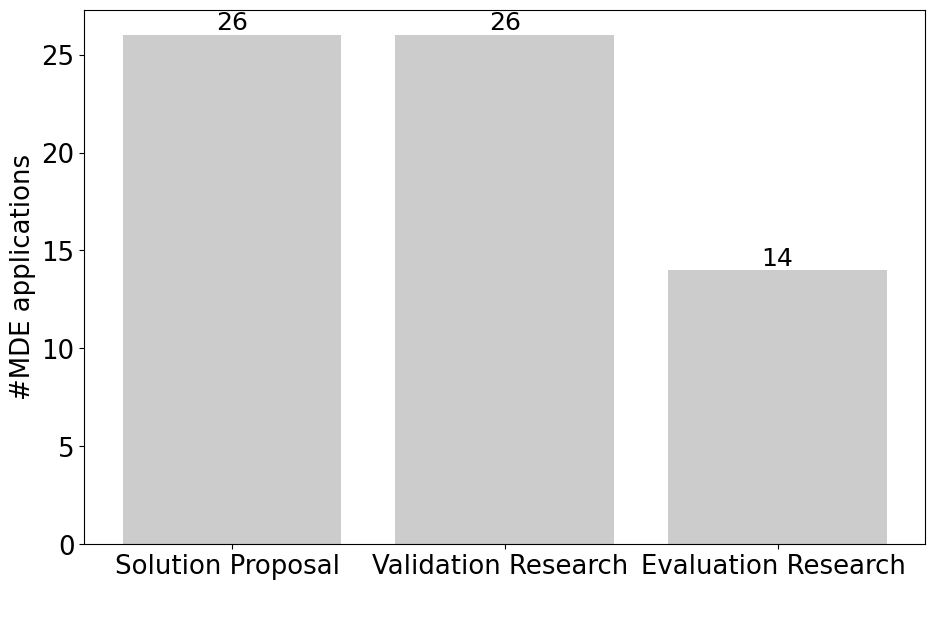

In [142]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figheight*0.8)
plot_data = dataframes[4]
#entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
entry_data = ["Solution Proposal \n", "Validation Research \n", "Evaluation Research \n"]
axes.bar(entry_data, plot_data['count'], color=fig_color)  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[4])

axes.set_xticklabels(entry_data, rotation=0)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#MDE applications")
plt.tight_layout()
plt.savefig(destination_folder+"TRL_barchart"+ fileformat)


In [85]:
domains = ['Accommodation', 'Electricity', 'Manufacturing', 'Transportation\n and Storage']

# Stacked Barcharts with MDE technique per X

occurrences_df = data["modeling language"].value_counts().reset_index()
occurrences_df.columns = ['entry', 'count']
occurrences_df = occurrences_df[occurrences_df['count'] > 1]
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(occurrences_df['entry'], occurrences_df['count'])
plt.ylabel('#Papers')
plt.title('# Papers per modeling language')
plt.xticks(rotation=90)  # Rotate the x-axis labels if they are too long
plt.show()

In [86]:
figheight = 6

In [87]:
import re

In [88]:
domains_techniques = pd.DataFrame(columns = ['value', 'technique'])
system_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twin_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twinning_target_techniques = pd.DataFrame(columns = ['value', 'technique'])
trl_techniques = pd.DataFrame(columns = ['value', 'technique'])
slcp_tlcp = pd.DataFrame(columns = ['value', 'slcp'])

with open(input_json, 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"] if contents["use case domain"] in domains else None
    trl = contents["Technological Readiness Level"]
    twinning_target = contents["twinning target"]

    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        twin_lcp1 = contents["twin lifecycle phase"]
        system_lcp1 = mdeContents["system lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": domain, "technique": mdeContents["model processing technique"]}])
        domains_techniques = pd.concat([domains_techniques, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"value": trl, "technique": mdeContents["model processing technique"]}])
        trl_techniques = pd.concat([trl_techniques, new_line], ignore_index=True)
        
        if twinning_target is not None:
            for v in twinning_target:
                new_line = pd.DataFrame([{"value": v, "technique": mdeContents["model processing technique"]}])
                twinning_target_techniques = pd.concat([twinning_target_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": twin_lcp1, "technique": mdeContents["model processing technique"]}])
        twin_lcp_techniques = pd.concat([twin_lcp_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": system_lcp1, "technique": mdeContents["model processing technique"]}])
        system_lcp_techniques = pd.concat([system_lcp_techniques, new_line], ignore_index=True)
        
        if (twin_lcp1 is not None):
            if (";" in twin_lcp1):
                for item in twin_lcp1.split(';'):
                    print(item)
                    new_line = pd.DataFrame([{"value": item, "slcp": system_lcp1}])
                    slcp_tlcp = pd.concat([slcp_tlcp, new_line], ignore_index=True)
            else:
                new_line = pd.DataFrame([{"value": twin_lcp1, "slcp": system_lcp1}])
                slcp_tlcp = pd.concat([slcp_tlcp, new_line], ignore_index=True)
        else:
            new_line = pd.DataFrame([{"value": twin_lcp1, "slcp": system_lcp1}])
            slcp_tlcp = pd.concat([slcp_tlcp, new_line], ignore_index=True)



As-Designed
As-Operated


In [147]:
slcp_tlcp_copy = slcp_tlcp.__deepcopy__()
name = 'slcp_tlcp_scatter'
colname = ['system lifecycle phase', 'twin lifecycle phase']
slcp_tlcp_copy = slcp_tlcp_copy.groupby(['slcp', 'value']).size().unstack().fillna(0).astype('int64')

In [148]:
slcp_tlcp_copy = slcp_tlcp_copy.transpose()[['Design', 'Implement', 'Operate']]

In [149]:
slcp_tlcp_copy

slcp,Design,Implement,Operate
value,,,
As-Designed,30,38,14
As-Operated,5,13,18


In [150]:
def scatter(y_value, column_name, df, x, x_values):
    y_plot = [y_value] * (len(x_values))
    labels =  df[column_name]
    plt.scatter(x, y_plot, labels*1500, color=fig_color)
    for i, txt in enumerate(labels):
        if(txt != 0):
            plt.annotate(txt, (x[i], y_plot[i]), fontsize=30, ha='center', va='center')


def scatter_for_df(df):
    x_values = list(df.index)
    y_values = list(df.columns)

    x = [i * 1 for i in range(1, len(x_values)+1)]
    y = range(1,len(y_values)+1)

    
    for idx in y:
        scatter(idx, y_values[idx-1], df, x, x_values)

    plt.xticks(ticks=x, labels=x_values, rotation=90, fontsize=30)
    plt.yticks(ticks=y, labels=y_values, fontsize=30)
    plt.grid()

value      As-Designed  As-Operated
slcp                               
Design              30            5
Implement           38           13
Operate             14           18


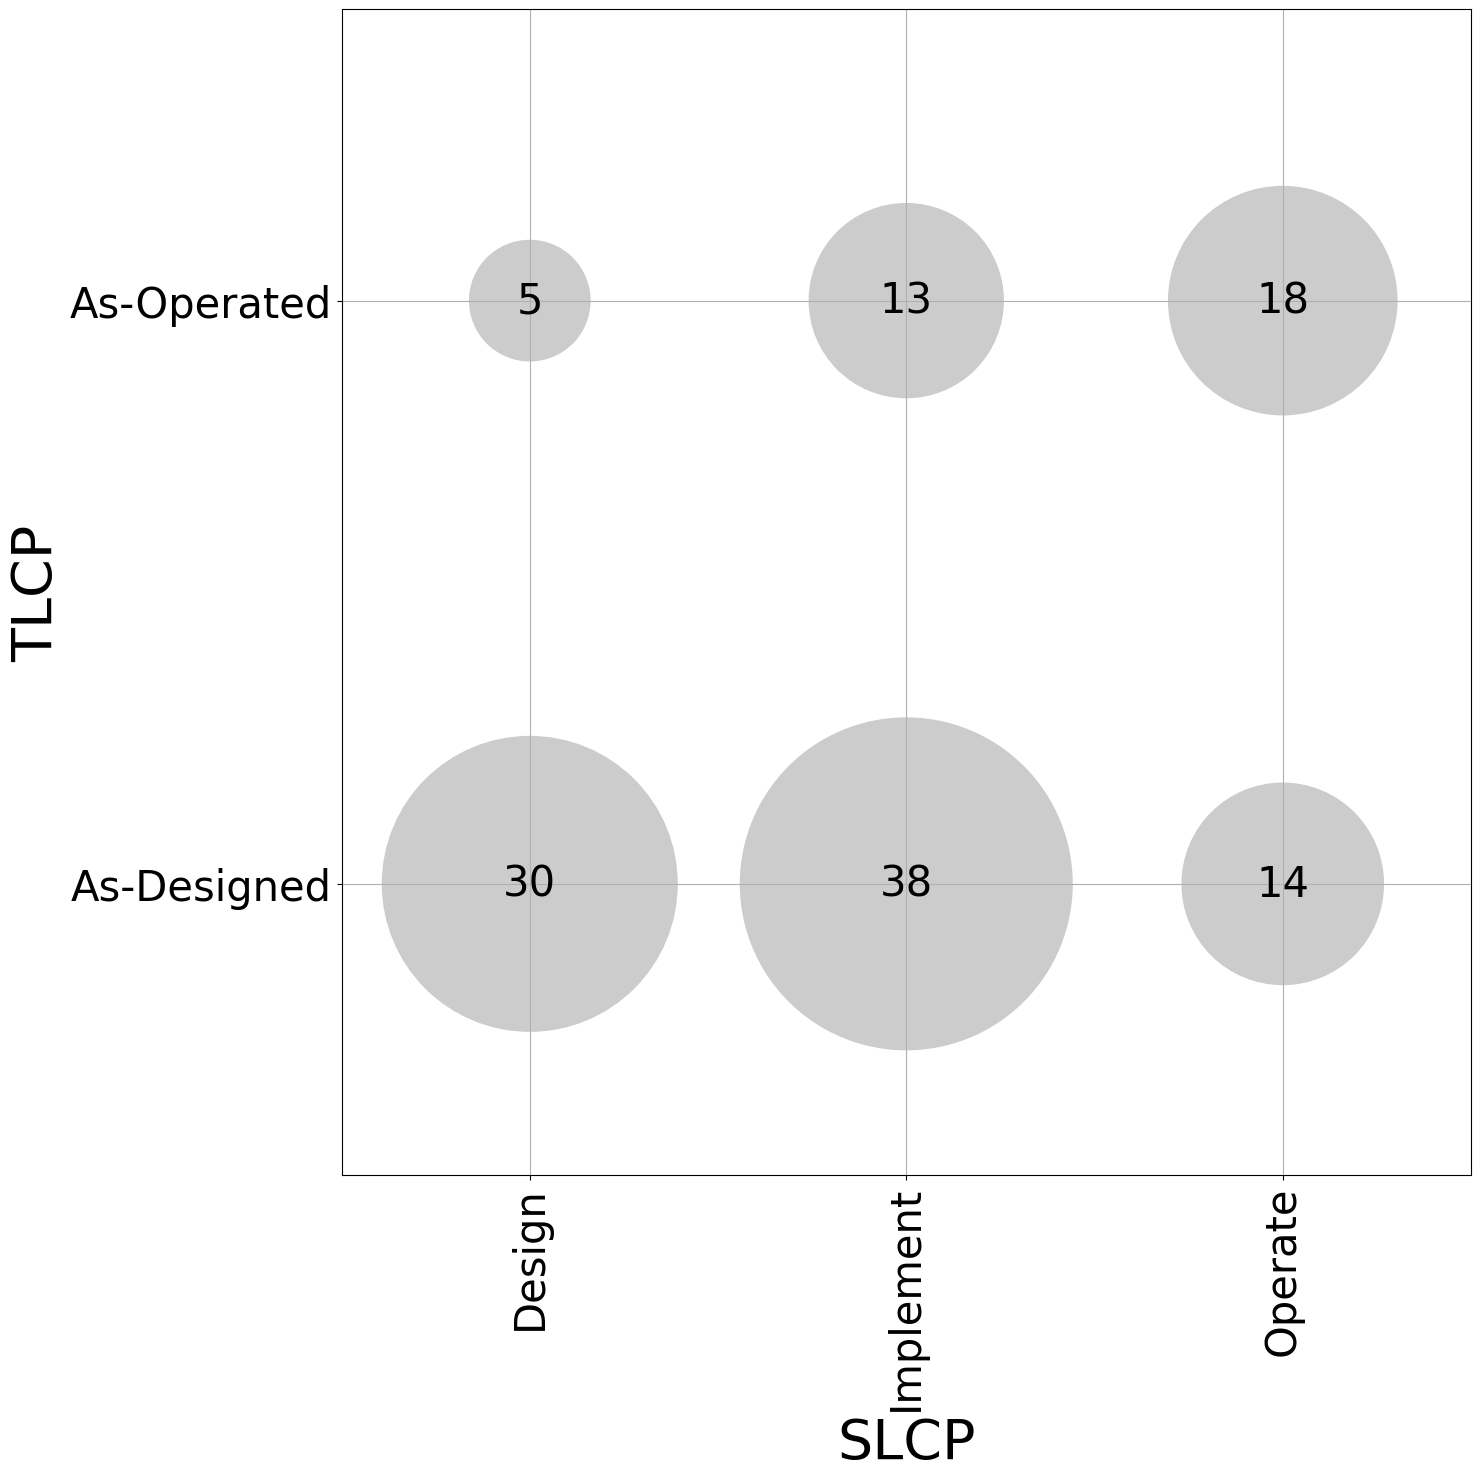

In [151]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
slcp_tlcp_copy_scatter = slcp_tlcp_copy.transpose()
print(slcp_tlcp_copy_scatter)
plt.figure(figsize=(15,15))
scatter_for_df(slcp_tlcp_copy_scatter)
plt.xlabel("SLCP", fontsize=40)
plt.ylabel("TLCP", fontsize=40)
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 2.5)
plt.tight_layout()
name = "slcp_tlcp_scatter"
plt.savefig(destination_folder + name + ".pdf")

# MDE scatter

In [60]:
todos = [domains_techniques,
system_lcp_techniques,
twin_lcp_techniques,
twinning_target_techniques,
trl_techniques,]
#slcp_tlcp ]

In [61]:
i = 0
for item in todos:
    #print(item[i])
    for col in item.columns:
        item1 = item.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')
        print(item1.columns)
        print(item1.transpose().columns)
        item1 = item.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64').reset_index()
    i+=1
    print("_________")
#        print(item1.columns)
#        print(item1.transpose().columns)

Index(['Accommodation', 'Electricity', 'Manufacturing'], dtype='object', name='value')
Index(['Code Generation', 'Model Interpretation',
       'Model to Model Transformation'],
      dtype='object', name='technique')
Index(['Accommodation', 'Electricity', 'Manufacturing'], dtype='object', name='value')
Index(['Code Generation', 'Model Interpretation',
       'Model to Model Transformation'],
      dtype='object', name='technique')
_________
Index(['Design', 'Implement', 'Maintain', 'Operate', 'Plan', 'Test'], dtype='object', name='value')
Index(['Code Generation', 'Model Interpretation',
       'Model to Model Transformation'],
      dtype='object', name='technique')
Index(['Design', 'Implement', 'Maintain', 'Operate', 'Plan', 'Test'], dtype='object', name='value')
Index(['Code Generation', 'Model Interpretation',
       'Model to Model Transformation'],
      dtype='object', name='technique')
_________
Index(['As-Designed', 'As-Designed;As-Operated', 'As-Operated'], dtype='object', n

In [89]:
domains = ['Accommodation', 'Electricity', 'Manufacturing',
       'Transportation\n and Storage']
mdetches = ['Code\n Generation', 'Model\n Interpretation',
       'Model to Model\n Transformation']
trls = ["Solution Proposal \n", "Validation Research \n", "Evaluation Research \n"]
systems= ['Individual Systems', 'Processes', 'Systems of\n Systems']
slcs = ['Design', 'Implement', 'Maintain', 'Operate', 'Plan', 'Test']
tlcs = ['As-Designed',  'As-Operated']

In [90]:
colnamePairs = [['use case domain', 'MDE technique'],
                ['system lifecycle phase', 'MDE technique'],
                ['twin lifecycle phase', 'MDE technique'],
                ['twinning target', 'MDE technique'],
                ['technological readiness level', 'MDE technique']]

In [91]:
domains_techniques_copy = domains_techniques.__deepcopy__()
system_lcp_techniques_copy = system_lcp_techniques.__deepcopy__()
twin_lcp_techniques_copy = twin_lcp_techniques.__deepcopy__()
twinning_target_techniques_copy= twinning_target_techniques.__deepcopy__()
trl_techniques_copy = trl_techniques.__deepcopy__()

In [92]:
domains_techniques_copy = domains_techniques_copy.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')
system_lcp_techniques_copy = system_lcp_techniques_copy.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')
twin_lcp_techniques_copy = twin_lcp_techniques_copy.groupby(['technique', 'value']).size()#.unstack().fillna(0).astype('int64')
twinning_target_techniques_copy = twinning_target_techniques_copy.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')
trl_techniques_copy = trl_techniques_copy.groupby(['technique', 'value']).size().unstack().fillna(0).astype('int64')


In [93]:
twin_lcp_techniques_copy['Model Interpretation']['As-Designed;As-Operated'] = 0
twin_lcp_techniques_copy['Model Interpretation']['As-Designed'] += 1
twin_lcp_techniques_copy['Model Interpretation']['As-Operated'] += 1

In [94]:
twin_lcp_techniques_copy['Model Interpretation']['As-Designed;As-Operated']

0

In [95]:
twin_lcp_techniques_copy.unstack().fillna(0).astype('int64')

value,As-Designed,As-Designed;As-Operated,As-Operated
technique,,,
Code Generation,33,0,11
Model Interpretation,28,0,16
Model to Model Transformation,32,0,13


In [96]:
twin_lcp_techniques_copy.replace(0, np.nan, inplace=True)

In [97]:
twin_lcp_techniques_copy.dropna(inplace=True)

In [98]:
twin_lcp_techniques_copy = twin_lcp_techniques_copy.astype('int64')

In [99]:
print(pd.unique(domains_techniques["value"]))#.columns = domains
domains_techniques_copy.transpose().columns = mdetches
system_lcp_techniques_copy.columns = slcs
system_lcp_techniques_copy.transpose().columns = mdetches
twin_lcp_techniques_copy.columns = tlcs
twin_lcp_techniques_copy.transpose().columns = mdetches
twinning_target_techniques_copy.columns= systems
twinning_target_techniques_copy.transpose().columns = mdetches
trl_techniques_copy.columns = trls
trl_techniques_copy.transpose().columns = mdetches

['Manufacturing' None 'Electricity' 'Accommodation']


In [100]:
domains_techniques_copy.transpose()

technique,Code Generation,Model Interpretation,Model to Model Transformation
value,,,
Accommodation,9,3,9
Electricity,2,1,5
Manufacturing,13,17,9


In [111]:
def scatter(y_value, column_name, df, x, x_values):
    y_plot = [y_value] * (len(x_values))
    labels =  df[column_name]
    plt.scatter(x, y_plot, labels*1500, color="0.8")
    for i, txt in enumerate(labels):
        if(txt != 0):
            plt.annotate(txt, (x[i], y_plot[i]), fontsize=30, ha='center', va='center')


def scatter_for_df(df):
    x_values = list(df.index)
    y_values = list(df.columns)

    x = [i * 1 for i in range(1, len(x_values)+1)]
    y = range(1,len(y_values)+1)

    
    for idx in y:
        scatter(idx, y_values[idx-1], df, x, x_values)

    plt.xticks(ticks=x, labels=x_values, fontsize=30)
    plt.yticks(ticks=y, labels=y_values, fontsize=30)
    plt.grid()

technique               Code Generation  Model Interpretation  \
Solution Proposal \n                  6                    13   
Validation Research \n               17                    14   
Evaluation Research \n               21                    14   

technique               Model to Model Transformation  
Solution Proposal \n                                7  
Validation Research \n                             16  
Evaluation Research \n                             20  


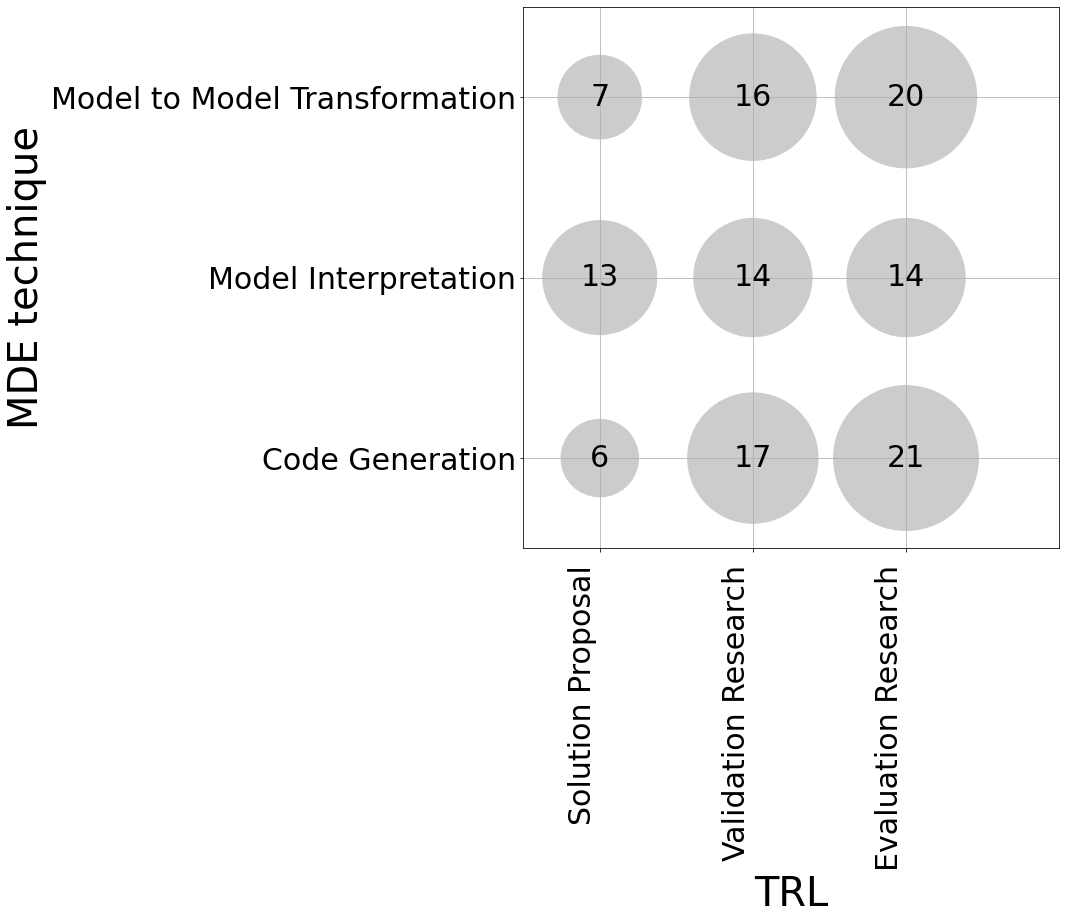

In [109]:

# MDE techniques per TRL
trl_techniques_copy_scatter = trl_techniques_copy.transpose()
print(trl_techniques_copy_scatter)
plt.figure(figsize=(15,13))
scatter_for_df(trl_techniques_copy_scatter)
plt.ylabel("MDE technique", fontsize=40)
plt.xlabel("TRL", fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 4)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + "TRL_MDE_scatter" + ".pdf")

technique              Code Generation  Model Interpretation  \
Individual \n Systems               30                    41   
Processes                            4                     1   
Systems of\n Systems                 5                     6   

technique              Model-to-Model \n Transformation  
Individual \n Systems                                26  
Processes                                             7  
Systems of\n Systems                                 10  


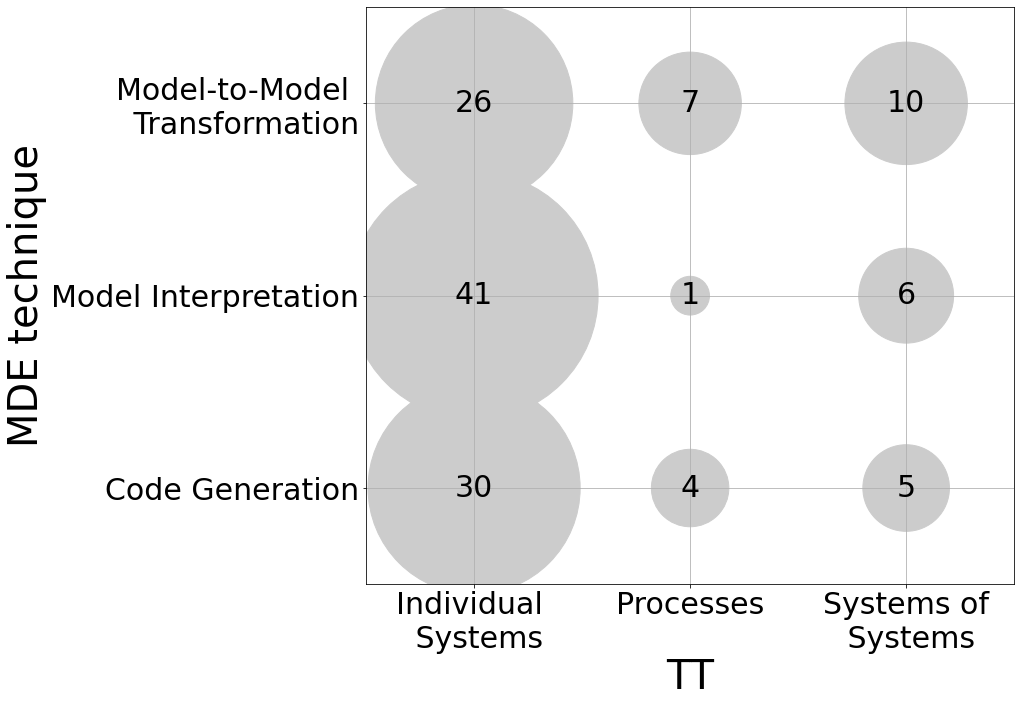

In [112]:

#MDE techniques per TT
twinning_target_techniques_copy_scatter = twinning_target_techniques_copy.transpose()
twinning_target_techniques_copy_scatter = twinning_target_techniques_copy_scatter.rename(columns={"Model to Model Transformation": "Model-to-Model \n Transformation"}, 
                                                                                         index={"Individual Systems": "Individual \n Systems"})
print(twinning_target_techniques_copy_scatter)
plt.figure(figsize=(15,10))
scatter_for_df(twinning_target_techniques_copy_scatter)
plt.xlabel("TT", fontsize=40)
plt.ylabel("MDE technique", fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + "TT_MDE_scatter" + ".pdf")

In [113]:
twin_lcp_techniques_copy.astype('int64').unstack()

value,As-Designed,As-Operated
technique,,
Code Generation,33,11
Model Interpretation,28,16
Model to Model Transformation,32,13


technique    Code Generation  Model Interpretation  \
value                                                
As-Designed               33                    28   
As-Operated               11                    16   

technique    Model-to-Model \n Transformation  
value                                          
As-Designed                                32  
As-Operated                                13  


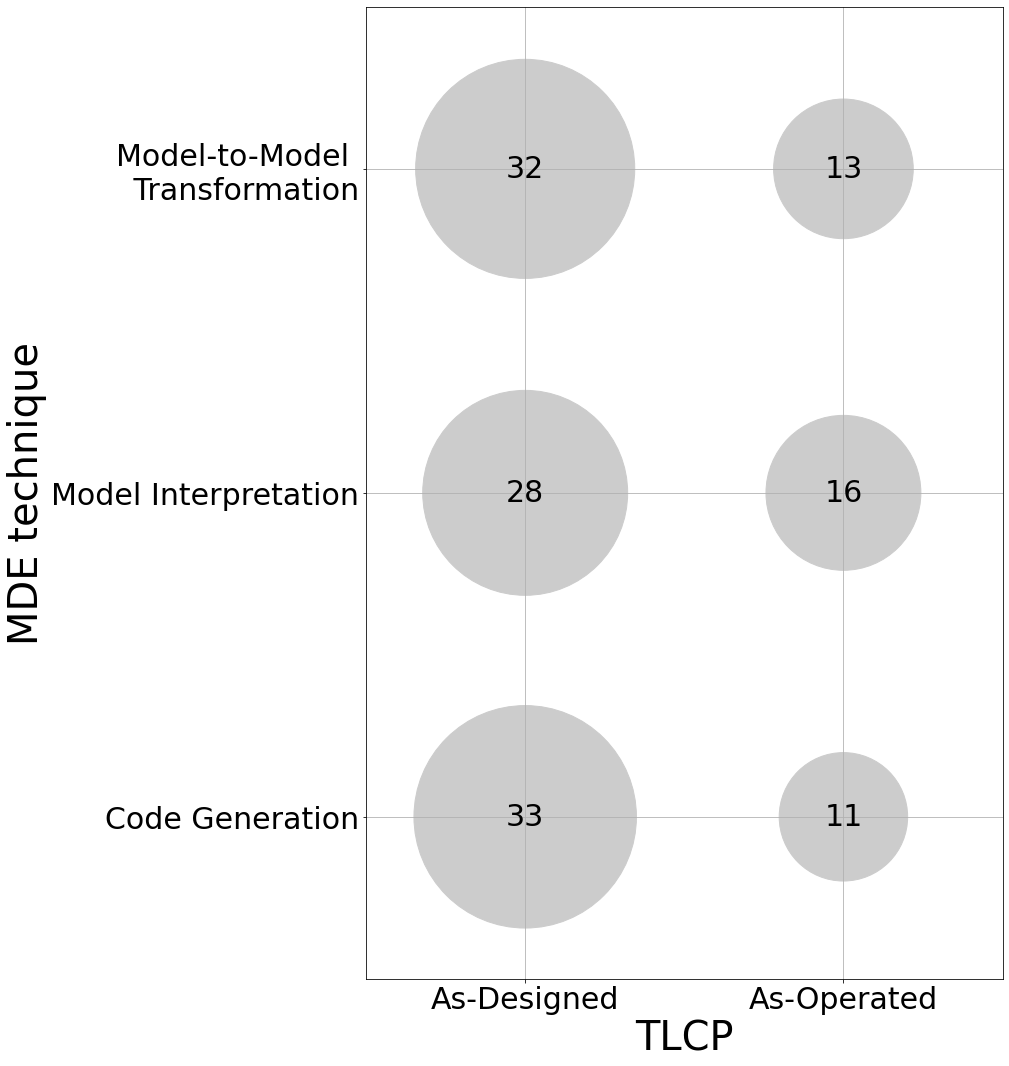

In [114]:
# MDE techniques per TLCP
twin_lcp_techniques_copy_scatter = twin_lcp_techniques_copy.astype('int64').unstack().transpose()
twin_lcp_techniques_copy_scatter = twin_lcp_techniques_copy_scatter.rename(columns={"Model to Model Transformation": "Model-to-Model \n Transformation"})
print(twin_lcp_techniques_copy_scatter)
plt.figure(figsize=(15,15))
scatter_for_df(twin_lcp_techniques_copy_scatter)
plt.xlabel("TLCP", fontsize=40)
plt.ylabel("MDE technique", fontsize=40)
plt.tight_layout()
plt.ylim(0.5, 3.5)
plt.xlim(0.5, 2.5)
plt.savefig(destination_folder + "TLCP_MDE_scatter" + ".pdf")

technique  Code Generation  Model Interpretation  \
Design                   2                    13   
Implement               31                     8   
Operate                  5                    20   

technique  Model-to-Model \n Transformation  
Design                                   20  
Implement                                12  
Operate                                   6  


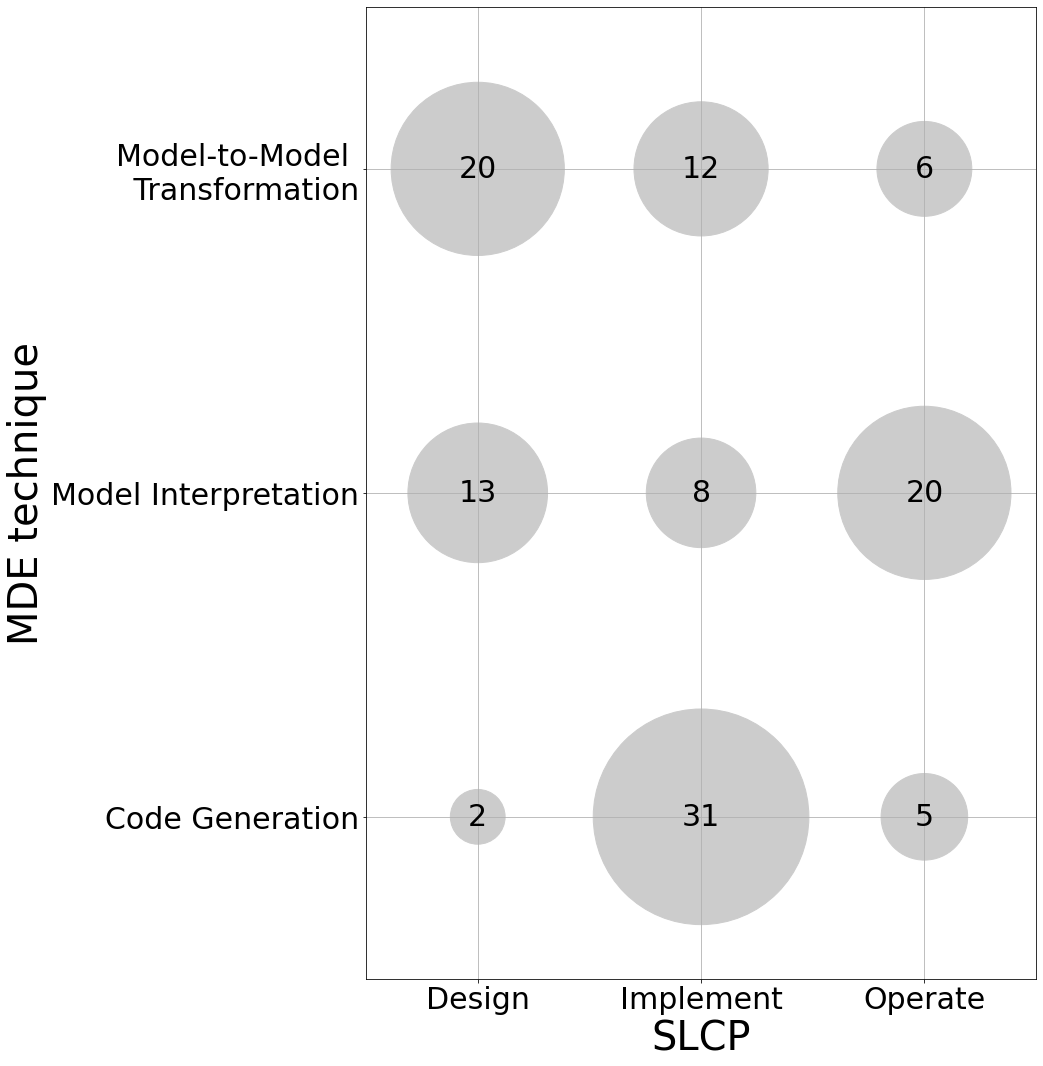

In [115]:
# MDE techniques per SLCP
system_lcp_techniques_copy_scatter = system_lcp_techniques_copy[['Design', 'Implement', 'Operate']].transpose()
system_lcp_techniques_copy_scatter = system_lcp_techniques_copy_scatter.rename(columns={"Model to Model Transformation": "Model-to-Model \n Transformation"})
print(system_lcp_techniques_copy_scatter)
plt.figure(figsize=(15,15))
scatter_for_df(system_lcp_techniques_copy_scatter)
plt.xlabel("SLCP", fontsize=40)
plt.ylabel("MDE technique", fontsize=40)
plt.tight_layout()
plt.ylim(0.5, 3.5)
plt.xlim(0.5, 3.5)
plt.savefig(destination_folder + "SLCP_MDE_scatter" +".pdf")

# TRL Scatter

In [172]:
todos = [
mde_trl,
domain_trl,
slcp_trl,
tlcp_trl,
tt_trl]

NameError: name 'mde_trl' is not defined

In [ ]:
domains = ['Accommodation', 'Electricity', 'Manufacturing']
mdetches = ['Code\n Generation', 'Model\n Interpretation',
       'Model to Model\n Transformation']
trls = ['TRL 1-3', 'TRL 4-6']
systems= ['Individual Systems', 'Processes', 'Systems of\n Systems']
slcs = ['Design', 'Implement','Operate']
tlcs = ['As-Designed',  'As-Operated']

In [ ]:
colnamePairs = [['use case domain', 'TRL'],
                ['system lifecycle phase', 'TRL'],
                ['twin lifecycle phase', 'TRL'],
                ['twinning target', 'TRL'],
                ['MDE technique', 'TRL']]

In [ ]:
mde_trl_copy = mde_trl.__deepcopy__()
domain_trl_copy = domain_trl.__deepcopy__()
slcp_trl_copy = slcp_trl.__deepcopy__()
tlcp_trl_copy= tlcp_trl.__deepcopy__()
tt_trl_copy = tt_trl.__deepcopy__()

NameError: name 'mde_trl' is not defined

In [ ]:
i = 0
for item in todos:
    print(names[i])
    for col in item.columns:
        item1 = item.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
        print(item1.columns)
        print(item1.transpose().columns)
        item1 = item.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64').reset_index()
    i+=1
    print("_________")
#        print(item1.columns)
#        print(item1.transpose().columns)

NameError: name 'names' is not defined

In [ ]:
mde_trl_copy = mde_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
domain_trl_copy = domain_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
slcp_trl_copy = slcp_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
tlcp_trl_copy = tlcp_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')
tt_trl_copy = tt_trl_copy.groupby(['trl', 'value']).size().unstack().fillna(0).astype('int64')


In [ ]:
mde_trl_copy.columns = ['Code Generation', 'Model\nInterpretation',
       'Model to Model \nTransformation']

In [ ]:
tt_trl_copy

value,Individual Systems,Processes,Systems of Systems
trl,,,
TRL 1-3,24,2,7
TRL 4-6,5,1,2


In [ ]:
# TRL per SLCP
slcp_trl_copy_scatter = slcp_trl_copy[slcs].transpose()
print(slcp_trl_copy_scatter)
plt.figure(figsize=(15,15))
scatter_for_df(slcp_trl_copy_scatter)
plt.xlabel("SLCP", fontsize=40)
plt.ylabel("TRL", fontsize=40)
plt.tight_layout()
plt.ylim(0.5, 2.5)
plt.xlim(0.5, 3.5)
plt.savefig(destination_folder + "SLCP_TRL_scatter" + ".pdf")

NameError: name 'slcp_trl_copy' is not defined

In [ ]:
# TRL per TLCP
tlcp_trl_copy_scatter = tlcp_trl_copy[tlcs].transpose()
print(tlcp_trl_copy_scatter)
plt.figure(figsize=(15,15))
scatter_for_df(tlcp_trl_copy_scatter)
plt.xlabel("TLCP", fontsize=40)
plt.ylabel("TRL", fontsize=40)
plt.tight_layout()
plt.ylim(0.5, 2.5)
plt.xlim(0.5, 2.5)
plt.savefig(destination_folder + "TLCP_TRL_scatter" + ".pdf")

NameError: name 'tlcp_trl_copy' is not defined

In [ ]:
# TRL per TT
tt_trl_copy_scatter = tt_trl_copy.transpose()
print(tt_trl_copy_scatter)
plt.figure(figsize=(15,8))
scatter_for_df(tt_trl_copy_scatter)
plt.xlabel("TT", fontsize=40)
plt.ylabel("TRL", fontsize=40)
plt.tight_layout()
plt.ylim(0.5, 2.5)
plt.xlim(0.5, 3.5)
plt.savefig(destination_folder + "TT_TRL_scatter" + ".pdf")

NameError: name 'tt_trl_copy' is not defined

# Stacked Barcharts with Domain per X

In [ ]:
import re

TypeError: unhashable type: 'list'

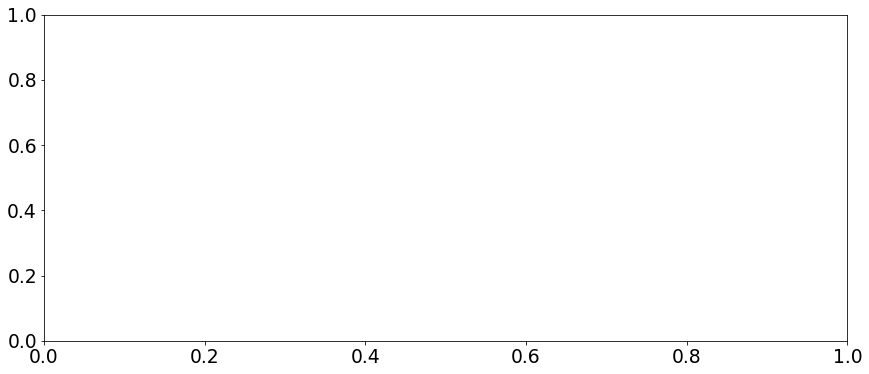

In [27]:
ucd_tt = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_tlcp = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_slcp = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_trl = pd.DataFrame(columns = ['value', 'use case domain'])



with open(input_json, 'r') as json_file:
    data_semistr = json.load(json_file)
    
#print(data_semistr)
for title, contents in data_semistr.items():
    tlcp = contents["twin lifecycle phase"]
    tt = contents["twinning target"]
    trl = contents["Technological Readiness Level"]
    ucd = contents["use case domain"] if contents["use case domain"] in domains else None

    

    try:
        for index, mdeContents in contents["modelTrafos"].items():
            
            mdeContents = json.loads(mdeContents)
            slcp = mdeContents['system lifecycle phase']

            new_line = pd.DataFrame([{"value": slcp, 'use case domain': ucd}])
            ucd_slcp = pd.concat([ucd_slcp, new_line], ignore_index=True)
            
        new_line = pd.DataFrame([{"value": tt, 'use case domain': ucd}])
        ucd_tt = pd.concat([ucd_tt, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": trl, 'use case domain': ucd}])
        ucd_trl = pd.concat([ucd_trl, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": tlcp, 'use case domain': ucd}])
        ucd_tlcp = pd.concat([ucd_tlcp, new_line], ignore_index=True)
    except KeyError as err:
        continue

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
ucd_tt = ucd_tt#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)

#for text in ucd_tt['use case domain']:
#    if text is not None:
#        if len(text) > 17:
#            ucd_tt['use case domain'] = ucd_tt['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))
ucd_tt['use case domain'].replace(' ', '\n', regex=True, inplace=True)

for text in ucd_tt['value']:
    if text is not None:
        if len(text) > 11:
            ucd_tt['value'] = ucd_tt['value'].replace(text, re.sub("(.{11})", "\\1\n", text, 0, re.DOTALL))

ax = ucd_tt.groupby(['use case domain','value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes, 
                                                                             ylabel="#MDE applications with TT", xlabel="")#, title="domain tt"
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
label_pre = 0
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_TT_barchart"+ fileformat)


fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
#ucd_tlcp = ucd_tlcp.groupby(['use case domain','value'])
ucd_tlcp = ucd_tlcp#.filter(lambda x : len(x) > 0)#.groupby(['value','use case domain'])
#for text in ucd_tlcp['use case domain']:
#    if text is not None:
#        if len(text) > 17:
#            ucd_tlcp['use case domain'] = ucd_tlcp['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))
ucd_tlcp['use case domain'].replace(' ', '\n', regex=True, inplace=True)
ax = ucd_tlcp.groupby(['use case domain','value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes, 
                                                                         ylabel="#MDE applications with TLCP",  xlabel="")#title="domain tlcp",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_TLCP_barchart"+ fileformat)



fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
ucd_slcp = ucd_slcp#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)

#for text in ucd_slcp['use case domain']:
#    if text is not None:
#        if len(text) > 17:
#            ucd_slcp['use case domain'] = ucd_slcp['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))
ucd_slcp['use case domain'].replace(' ', '\n', regex=True, inplace=True)
ax = ucd_slcp.groupby(['use case domain','value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes,
                                                                                     ylabel="#MDE applications with SLCP",  xlabel="")#title="domain slcp",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)

plt.tight_layout()
plt.savefig(destination_folder+"Domain_SLCP_barchart"+ fileformat)



fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
ucd_trl = ucd_trl#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
#for text in ucd_trl['use case domain']:
#    if text is not None:
#        if len(text) > 17:
#            ucd_trl['use case domain'] = ucd_trl['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))
ucd_trl['use case domain'].replace(' ', '\n', regex=True, inplace=True)
ax = ucd_trl.groupby(['use case domain','value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes,
                                                                                     ylabel="#MDE applications with TRL", xlabel="")# title="domain trl",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_TRL_barchart"+ fileformat)

# Scatter per domain

In [28]:
todos = [
ucd_tt,
ucd_tlcp,
ucd_slcp,
ucd_trl]
#slcp_tlcp ]

In [29]:
colnamePairs = [['twinning target', 'use case domain'],
                ['twin lifecycle phase', 'use case domain'],
                ['system lifecycle phase', 'use case domain'],
                ['TRL', 'use case domain'],
                ]

In [30]:
ucd_tt_copy = ucd_tt.__deepcopy__()
ucd_tlcp_copy = ucd_tlcp.__deepcopy__()
ucd_slcp_copy = ucd_slcp.__deepcopy__()
ucd_trl_copy = ucd_trl.__deepcopy__()

In [31]:
ucd_tt_copy = ucd_tt_copy.groupby(['use case domain', 'value']).size().unstack().fillna(0).astype('int64')
ucd_tlcp_copy = ucd_tlcp_copy.groupby(['use case domain', 'value']).size().unstack().fillna(0).astype('int64')
ucd_slcp_copy = ucd_slcp_copy.groupby(['use case domain', 'value']).size().unstack().fillna(0).astype('int64')
ucd_trl_copy = ucd_trl_copy.groupby(['use case domain', 'value']).size().unstack().fillna(0).astype('int64')


TypeError: unhashable type: 'list'

In [32]:
ucd_slcp_copy.replace(0, np.nan, inplace=True)

In [33]:
ucd_slcp_copy.dropna(axis=1, inplace=True)

In [ ]:
ucd_trl_copy

value,Evaluation Research,Solution Proposal,Validation Research
use case domain,,,
Accommodation,0,2,3
Electricity,0,3,1
Manufacturing,4,2,8


In [ ]:
def scatter(y_value, column_name, df, x, x_values):
    y_plot = [y_value] * (len(x_values))
    labels =  df[column_name]
    plt.scatter(x, y_plot, labels*1500, color="0.8")
    for i, txt in enumerate(labels):
        if(txt != 0):
            plt.annotate(txt, (x[i], y_plot[i]), fontsize=30, ha='center', va='center')


def scatter_for_df(df):
    x_values = list(df.index)
    y_values = list(df.columns)

    x = [i * 1 for i in range(1, len(x_values)+1)]
    y = range(1,len(y_values)+1)

    
    for idx in y:
        scatter(idx, y_values[idx-1], df, x, x_values)

    plt.xticks(ticks=x, labels=x_values, rotation=90, fontsize=30)
    plt.yticks(ticks=y, labels=y_values, fontsize=30)
    plt.grid()

technique                     Code Generation  Model Interpretation  \
Accommodation                               7                     2   
Electricity                                 2                     1   
Manufacturing                              10                    14   
Transportation\n and Storage                5                    10   

technique                     Model-to-Model \n Transformation  
Accommodation                                                6  
Electricity                                                  4  
Manufacturing                                                8  
Transportation\n and Storage                                 0  


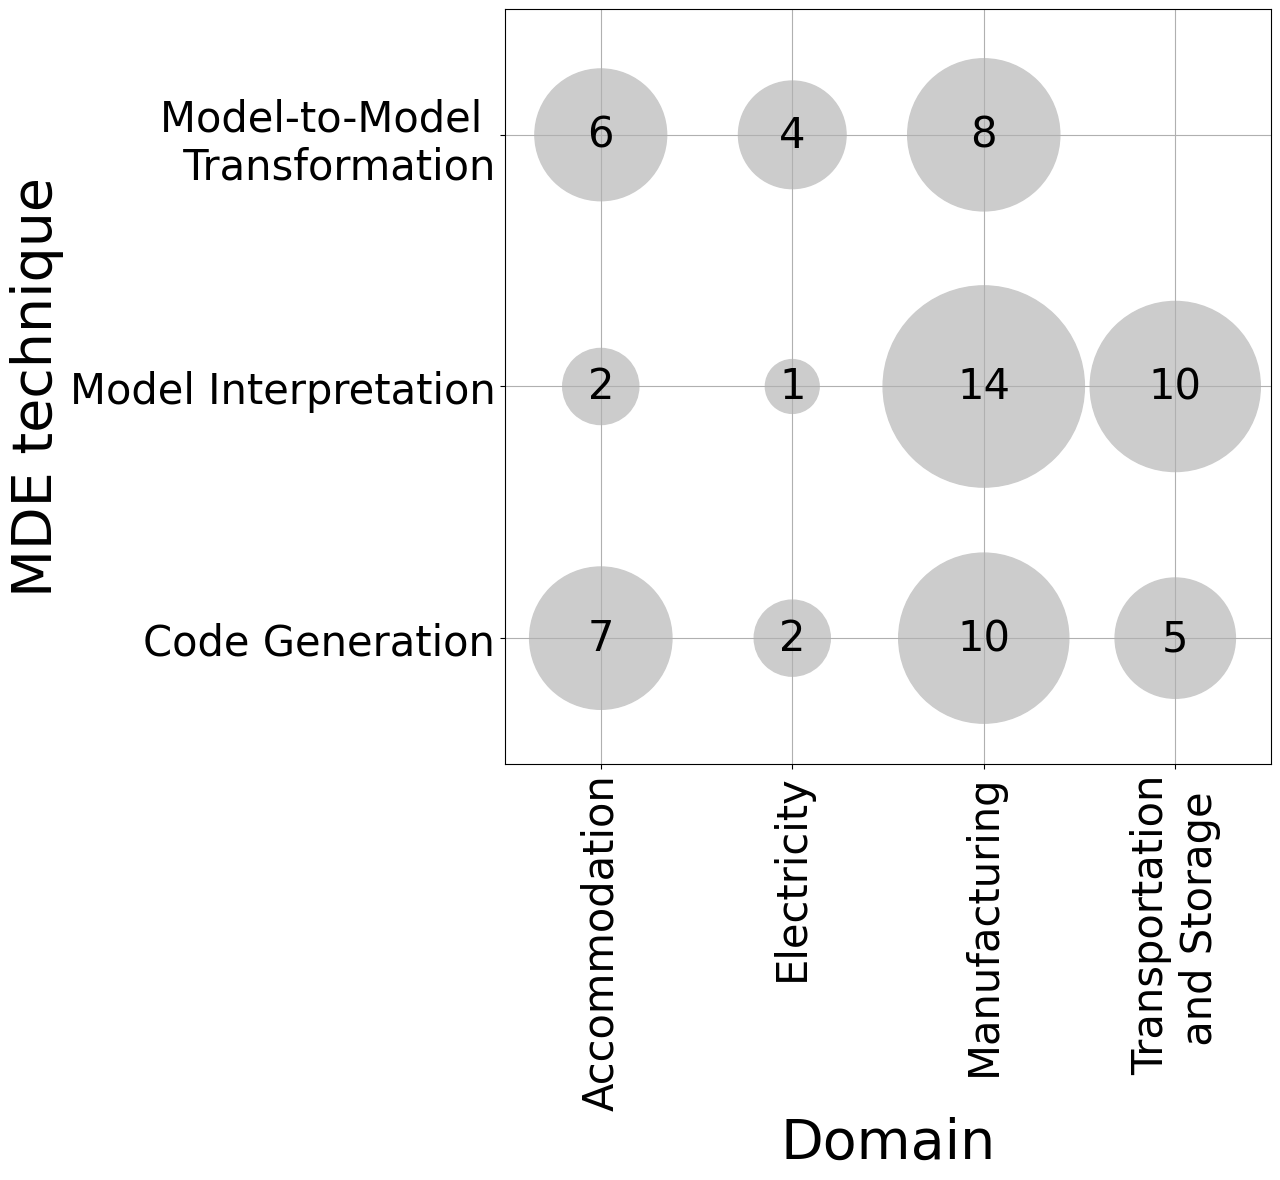

In [ ]:
# MDE techniques per domain
domains_techniques_copy_scatter = domains_techniques_copy.transpose()
domains_techniques_copy_scatter = domains_techniques_copy_scatter.rename(columns={"Model to Model Transformation": "Model-to-Model \n Transformation"})
print(domains_techniques_copy_scatter)
plt.figure(figsize=(13,12))
scatter_for_df(domains_techniques_copy_scatter)
plt.xlabel("Domain", fontsize=40)
plt.ylabel("MDE technique", fontsize=40)
plt.ylim(0.5, 3.5)
plt.xlim(0.5, 4.5)
plt.tight_layout()
plt.savefig(destination_folder + "Domain_MDE_scatter" + ".pdf")

value            Individual \nSystems  \
use case domain                         
Accommodation                       3   
Electricity                         3   
Manufacturing                       6   

value            Individual \nSystems;Ind\nividual Sys\ntems  \
use case domain                                                
Accommodation                                              1   
Electricity                                                0   
Manufacturing                                              2   

value            Systems of \nSystems  \
use case domain                         
Accommodation                       1   
Electricity                         1   
Manufacturing                       2   

value            Individual \nSystems;Ind\nividual Sys\ntems;Indivi\ndual System\ns  \
use case domain                                                                       
Accommodation                                                    0                    
Electr

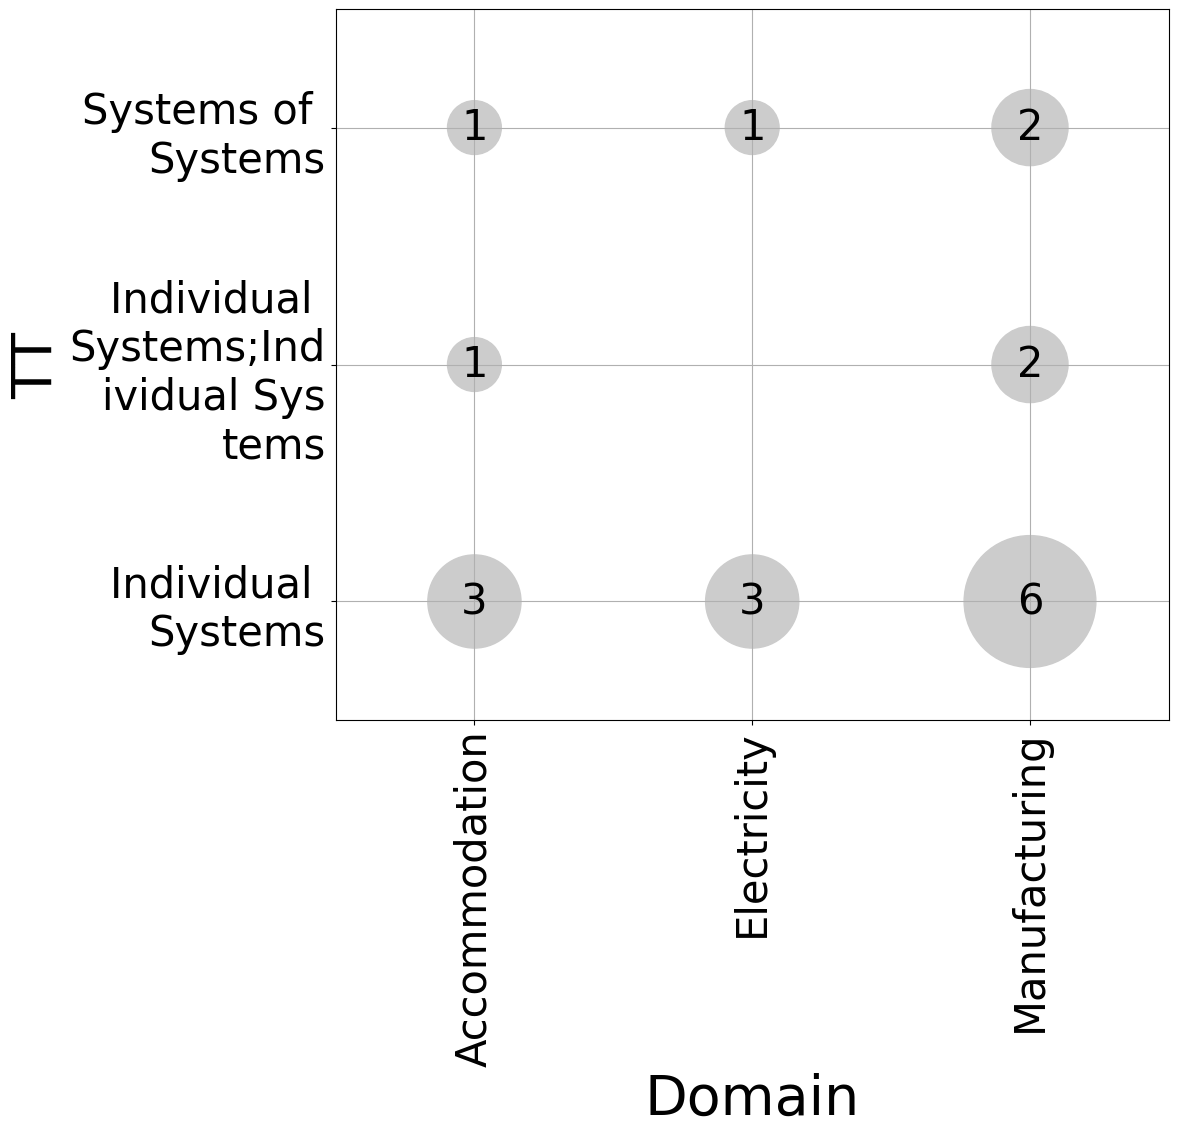

In [ ]:

#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
ucd_tt_copy = ucd_tt_copy
print(ucd_tt_copy)
plt.figure(figsize=(12,12))
scatter_for_df(ucd_tt_copy)
plt.xlabel("Domain", fontsize=40)
plt.ylabel("TT", fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + "Domain_TT_scatter" + ".pdf")

value            As-Designed  As-Operated
use case domain                          
Accommodation              4            1
Electricity                4            0
Manufacturing              9            5


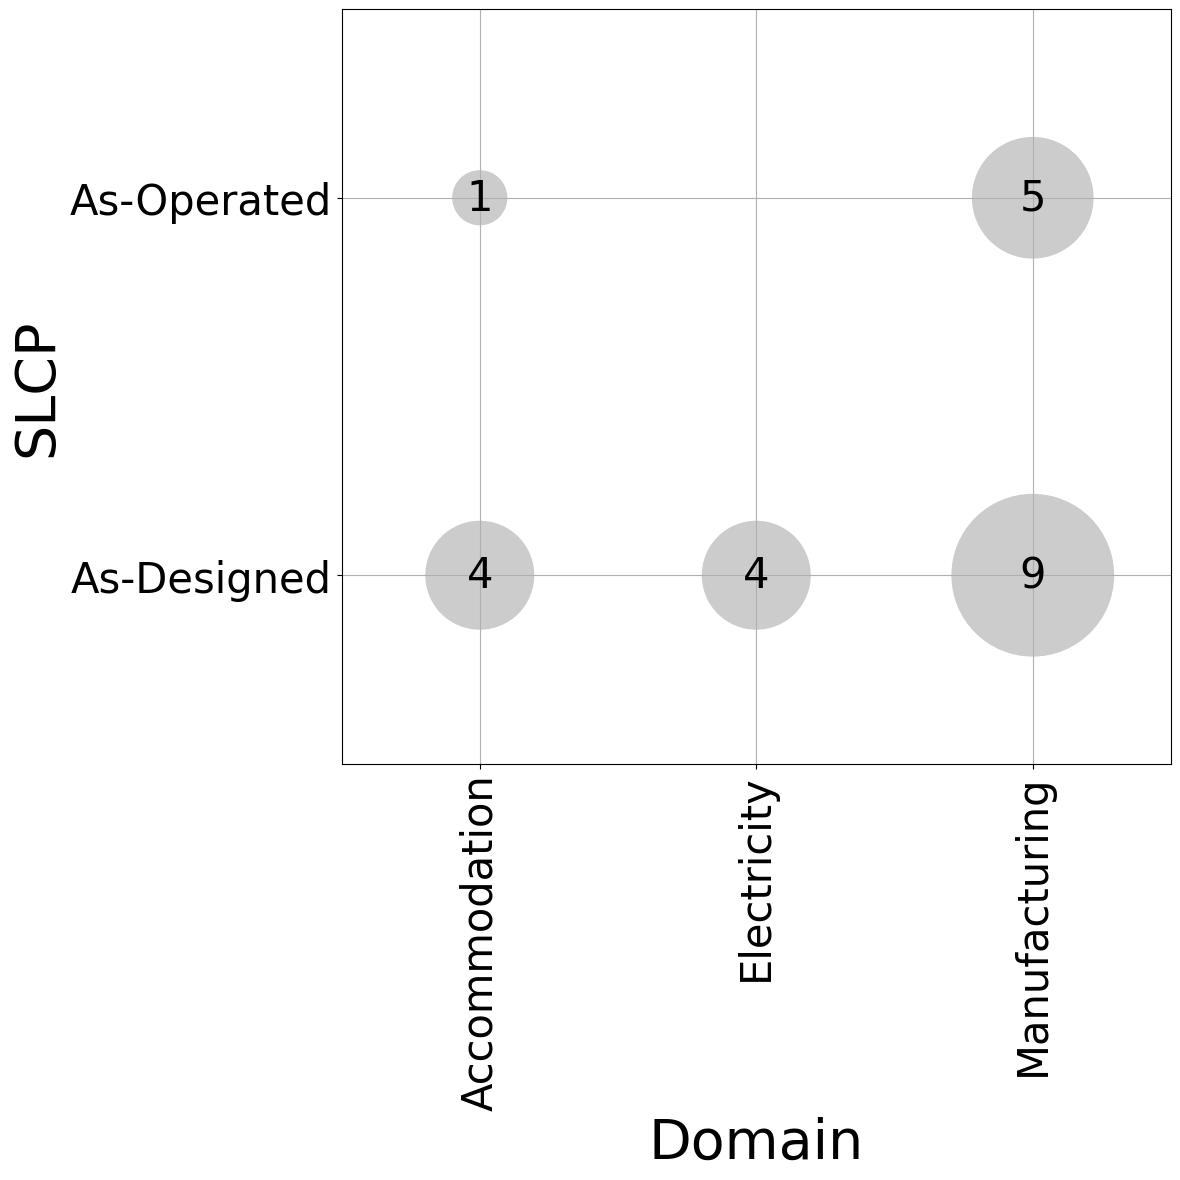

In [ ]:
#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
ucd_tlcp_copy = ucd_tlcp_copy
print(ucd_tlcp_copy)
plt.figure(figsize=(12,12))
size_multiplier = 2500
scatter_for_df(ucd_tlcp_copy)
plt.xlabel("Domain", fontsize=40)
plt.ylabel("SLCP", fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 2.5)
plt.savefig(destination_folder + "Domain_SLCP_scatter" + ".pdf")

value            Design  Implement  Operate
use case domain                            
Accommodation         3         11        1
Electricity           1          5        1
Manufacturing        10         12        9


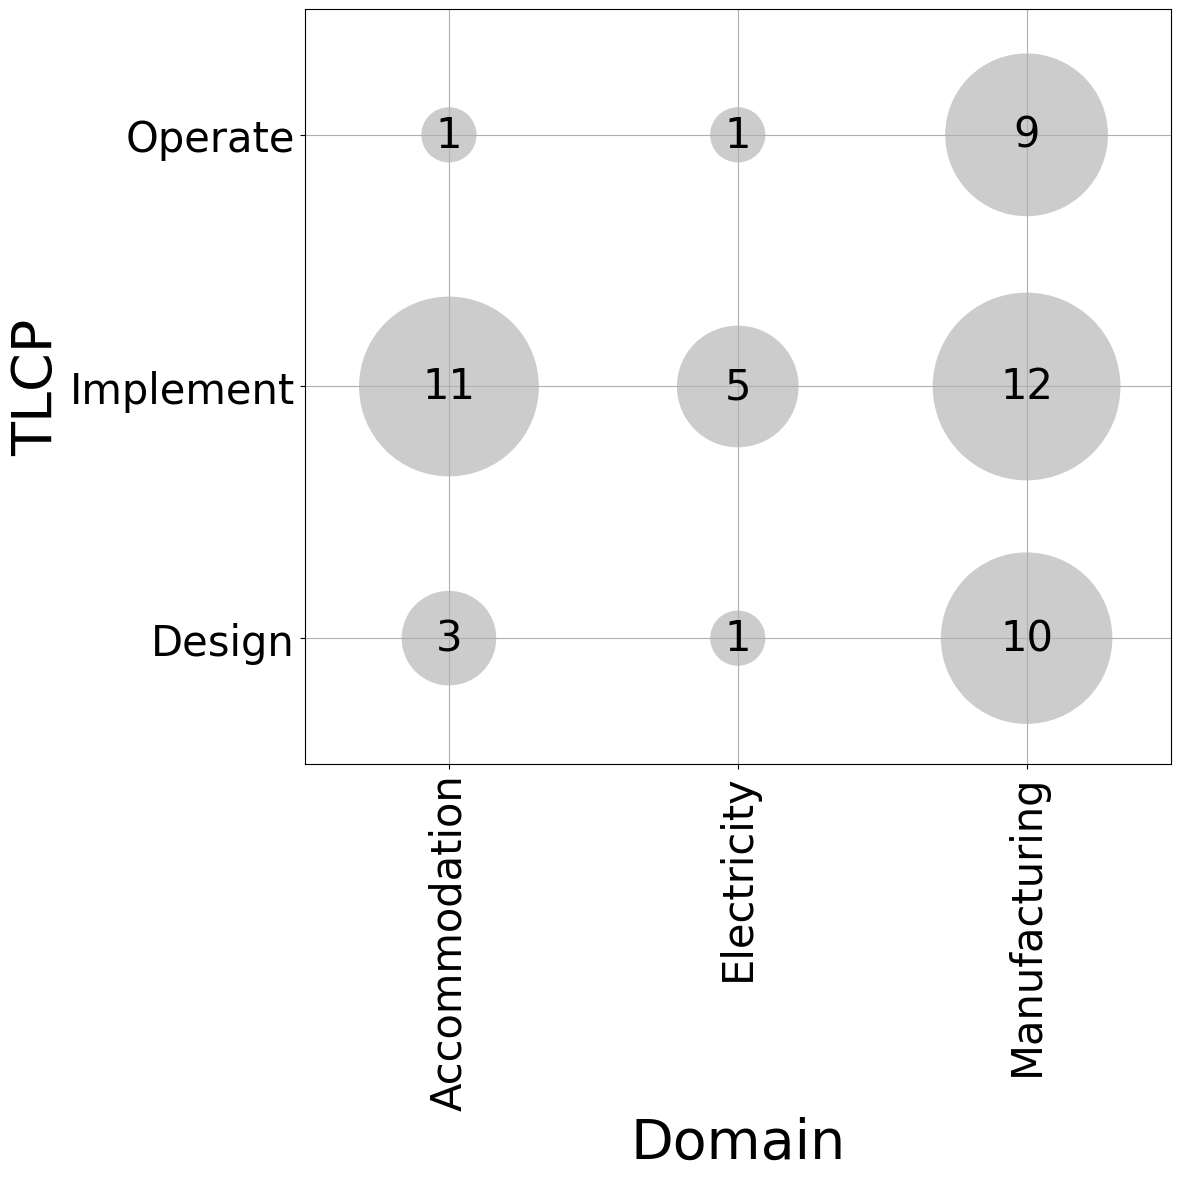

In [ ]:
#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
ucd_slcp_copy = ucd_slcp_copy
print(ucd_slcp_copy)
plt.figure(figsize=(12,12))
scatter_for_df(ucd_slcp_copy)
plt.xlabel("Domain", fontsize=40)
plt.ylabel("TLCP", fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 3.5)
plt.savefig(destination_folder + "Domain_TLCP_scatter" + ".pdf")

value            Evaluation Research  Solution Proposal  Validation Research
use case domain                                                             
Accommodation                      0                  2                    3
Electricity                        0                  3                    1
Manufacturing                      4                  2                    8


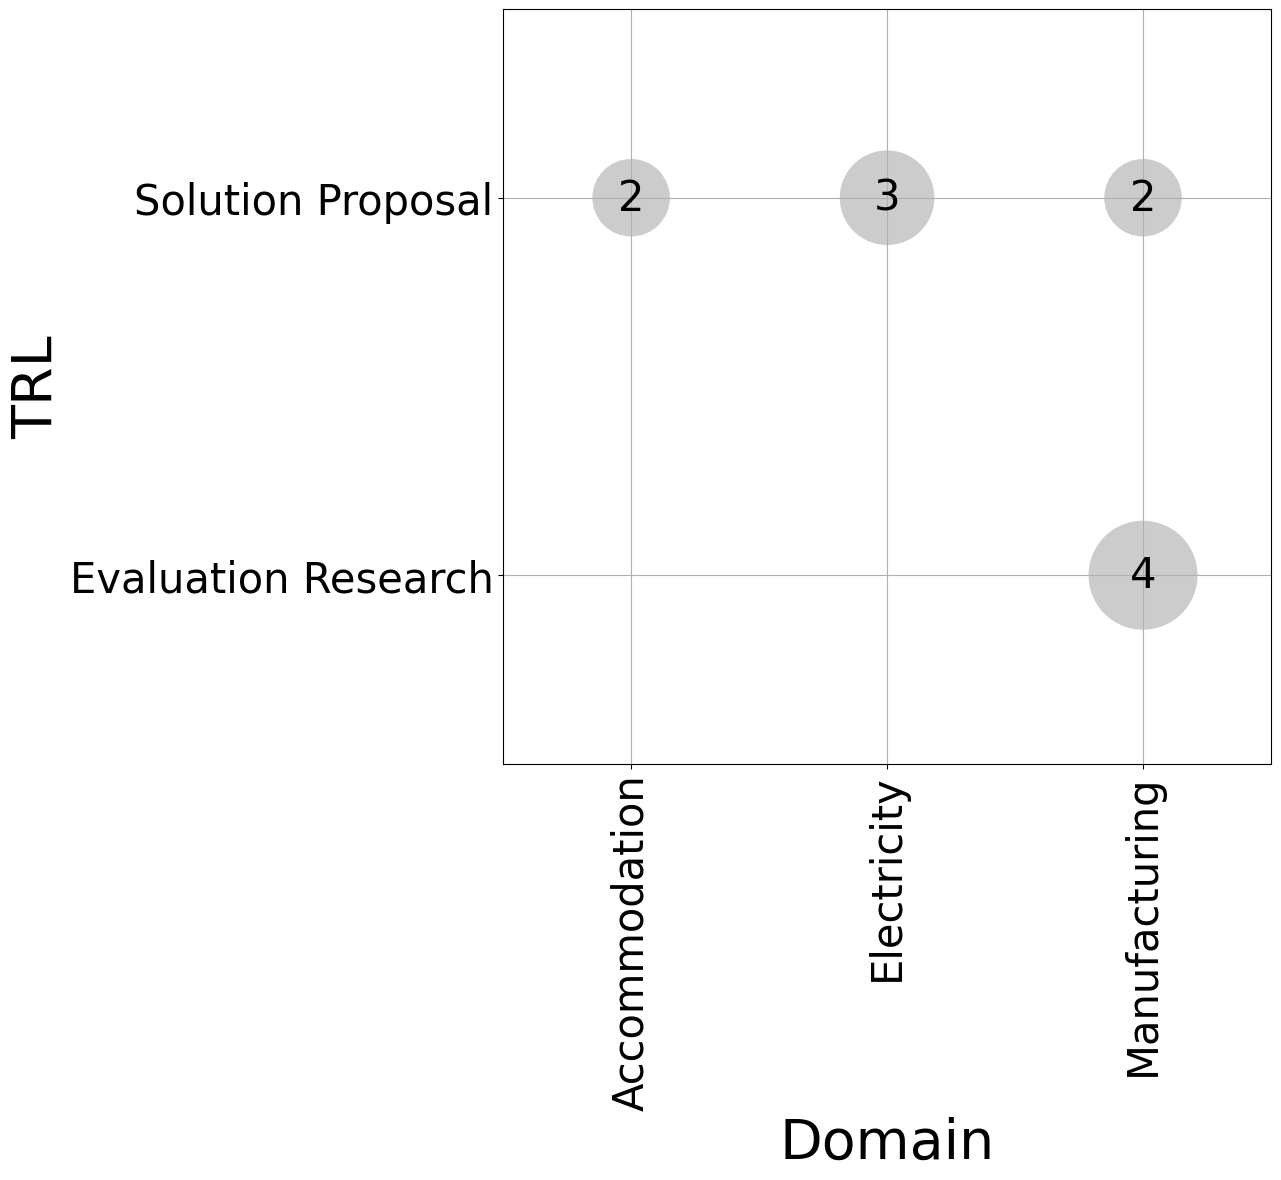

In [ ]:
#source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
ucd_trl_copy = ucd_trl_copy
print(ucd_trl_copy)
plt.figure(figsize=(13,12))
size_multiplier = 2500
scatter_for_df(ucd_trl_copy)
plt.xlabel("Domain", fontsize=40)
plt.ylabel("TRL", fontsize=40)
plt.tight_layout()
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 2.5)
plt.savefig(destination_folder + "Domain_TRL_scatter" + ".pdf")

# Source/Target Scatterplots

In [ ]:
source_target_mde_domain = pd.DataFrame(columns = ['source', 'target', 'mde', 'domain'])
target_categories = pd.DataFrame(columns = ['cat'])
main_categories = pd.DataFrame(columns = ['source'])
twin_system_lcp = pd.DataFrame(columns = ['tlcp', 'slcp'])


with open("./target/json/data_consolidated_semistructured__4.json", 'r') as json_file:
    data_semistr = json.load(json_file)
    
#mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    keys = contents.keys()
    if "use case domain" in keys:
        domain = contents["use case domain"]
    else:
        domain = "N/A"
    trl = contents["Technological Readiness Level"]
    twinning_target = contents["twinning target"]
    for index, mdeContents in contents["modelTrafos"].items():
        mdeContents = json.loads(mdeContents)
        src_cat_1 = mdeContents["source category"]
        src_cat_2 = mdeContents["source sub-category 1"]
        src_cat_2_1 = mdeContents["source sub-category 2"]
        src_cat_3 = mdeContents["source model target category"]
        trg_cat_1 = mdeContents["target category"]
        trg_cat_1_1 = mdeContents["target category 2"]
        trg_cat_2 = mdeContents["target sub-category 1"]
        trg_cat_2_1 = mdeContents["target sub-category 2"]
        tlcp = contents["twin lifecycle phase"]
        slcp = mdeContents["system lifecycle phase"]
        trg_cat_3 = mdeContents["target model target category"]
        mde_technique = mdeContents["model processing technique"]
        new_line = pd.DataFrame([{"source": src_cat_2, "target": trg_cat_2, "mde": mde_technique, "domain": domain}])
        source_target_mde_domain = pd.concat([source_target_mde_domain, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"source": src_cat_2, "target": trg_cat_2_1, "mde": mde_technique, "domain": domain}])
        source_target_mde_domain = pd.concat([source_target_mde_domain, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"source": src_cat_2_1, "target": trg_cat_2, "mde": mde_technique, "domain": domain}])
        source_target_mde_domain = pd.concat([source_target_mde_domain, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"source": src_cat_2_1, "target": trg_cat_2_1, "mde": mde_technique, "domain": domain}])
        source_target_mde_domain = pd.concat([source_target_mde_domain, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"cat": src_cat_3}])
        target_categories = pd.concat([target_categories, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"cat": trg_cat_3}])
        target_categories = pd.concat([target_categories, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"cat": src_cat_1}])
        main_categories = pd.concat([main_categories, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"cat": trg_cat_1}])
        main_categories = pd.concat([main_categories, new_line], ignore_index=True)
        #new_line = pd.DataFrame([{"cat": trg_cat_1_1}])
        #main_categories = pd.concat([main_categories, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"tlcp": tlcp, "slcp": slcp}])
        twin_system_lcp = pd.concat([twin_system_lcp, new_line], ignore_index=True)

#print(source_target_mde_domain[source_target_mde_domain["target"] == "Machine Learning Model"])
#print("#############################")
source_target_mde = source_target_mde_domain.drop("domain", axis=1)
source_target_mtom = source_target_mde[source_target_mde['mde'] == "Model to Model Transformation"]  
source_target_mtom = source_target_mtom.drop("mde", axis=1)
source_target_mtom = source_target_mtom.dropna()
source_target_mtom = source_target_mtom.groupby(["source", "target"]).size().unstack()
source_target_mtom = source_target_mtom.fillna(0).astype(int)
source_target_mtom.to_csv("./data/categorization_modeltomodel.csv", sep=";", index=True)

source_target_mi = source_target_mde[source_target_mde['mde'] == "Model Interpretation"]  
source_target_mi = source_target_mi.dropna()
source_target_mi = source_target_mi.groupby(["source", "target"]).size().unstack()
source_target_mi = source_target_mi.fillna(0).astype(int)
#print(source_target_mi)

source_target_mi.to_csv("./data/categorization_modelinterpretation.csv", sep=";", index=True)

source_target_mtot = source_target_mde[source_target_mde['mde'] == "Code Generation"]  
source_target_mtot = source_target_mtot.dropna()
source_target_mtot = source_target_mtot.groupby(["source", "target"]).size().unstack()
source_target_mtot = source_target_mtot.fillna(0).astype(int)
source_target_mtot.to_csv("./data/categorization_modeltotext.csv", sep=";", index=True)

twin_system_lcp = twin_system_lcp[twin_system_lcp["slcp"].isin(["Design", "Implement", "Operate"])]
twin_system_lcp = twin_system_lcp[twin_system_lcp["tlcp"].isin(["As-Designed", "As-Operated"])]
twin_system_lcp = twin_system_lcp.groupby(["tlcp", "slcp"]).size().unstack()
twin_system_lcp = twin_system_lcp.fillna(0).astype(int)
twin_system_lcp.to_csv("./data/twin_system_lcp.csv", sep=";")

source_target_mde_domain = source_target_mde_domain[source_target_mde_domain["domain"].isin(["Manufacturing", "Accommodation", "Transportation and Storage", "Electricity"])]

# Experimental
source_target_mi = source_target_mde[source_target_mde['mde'] == "Model Interpretation"]  
source_target_mi = source_target_mi.dropna()
source_target_mtot = source_target_mde[source_target_mde['mde'] == "Code Generation"]  
source_target_mtot = source_target_mtot.dropna()
source_target_mtom = source_target_mde[source_target_mde['mde'] == "Model to Model Transformation"]  
source_target_mtot = source_target_mtot.dropna()
models = source_target_mtom["source"] 
models = models.append(source_target_mtom["target"], ignore_index=True)
models = models.append(source_target_mtot["source"], ignore_index=True)
generation_target = source_target_mde[source_target_mde['mde'] == "Code Generation"] 
#generation_target = generation_target[generation_target['target'].isin(software_categories)]
generation_target = generation_target.groupby("target").size()
interpretation_engines = source_target_mde[source_target_mde['mde'] == "Model Interpretation"] 
#interpretation_engines = interpretation_engines[interpretation_engines['target'].isin(software_categories)]
interpretation_engines = interpretation_engines.groupby("target").size()
models.to_csv("./data/model_artefacts.csv", sep=";", index=True)
generation_target.to_csv("./data/generation_targets.csv", sep=";", index=True)
interpretation_engines.to_csv("./data/interpretation_engines.csv", sep=";", index=True)

KeyError: 'target category 2'

In [ ]:


def scatter(y_value, column_name, df, x, x_values):
    y_plot = [y_value] * (len(x_values))
    labels =  df[column_name]
    plt.scatter(x, y_plot, labels*2500, color=fig_color)
    for i, txt in enumerate(labels):
        if(txt != 0):
            plt.annotate(txt, (x[i], y_plot[i]), fontsize=30, ha='center', va='center')


def scatter_for_df(df):
    x_values = list(df.index)
    y_values = list(df.columns)

    x = [i * 1 for i in range(1, len(x_values)+1)]
    y = range(1,len(y_values)+1)

    
    for idx in y:
        scatter(idx, y_values[idx-1], df, x, x_values)

    plt.xticks(ticks=x, labels=x_values, rotation=90, fontsize=30)
    plt.yticks(ticks=y, labels=y_values, fontsize=30)
    plt.grid()

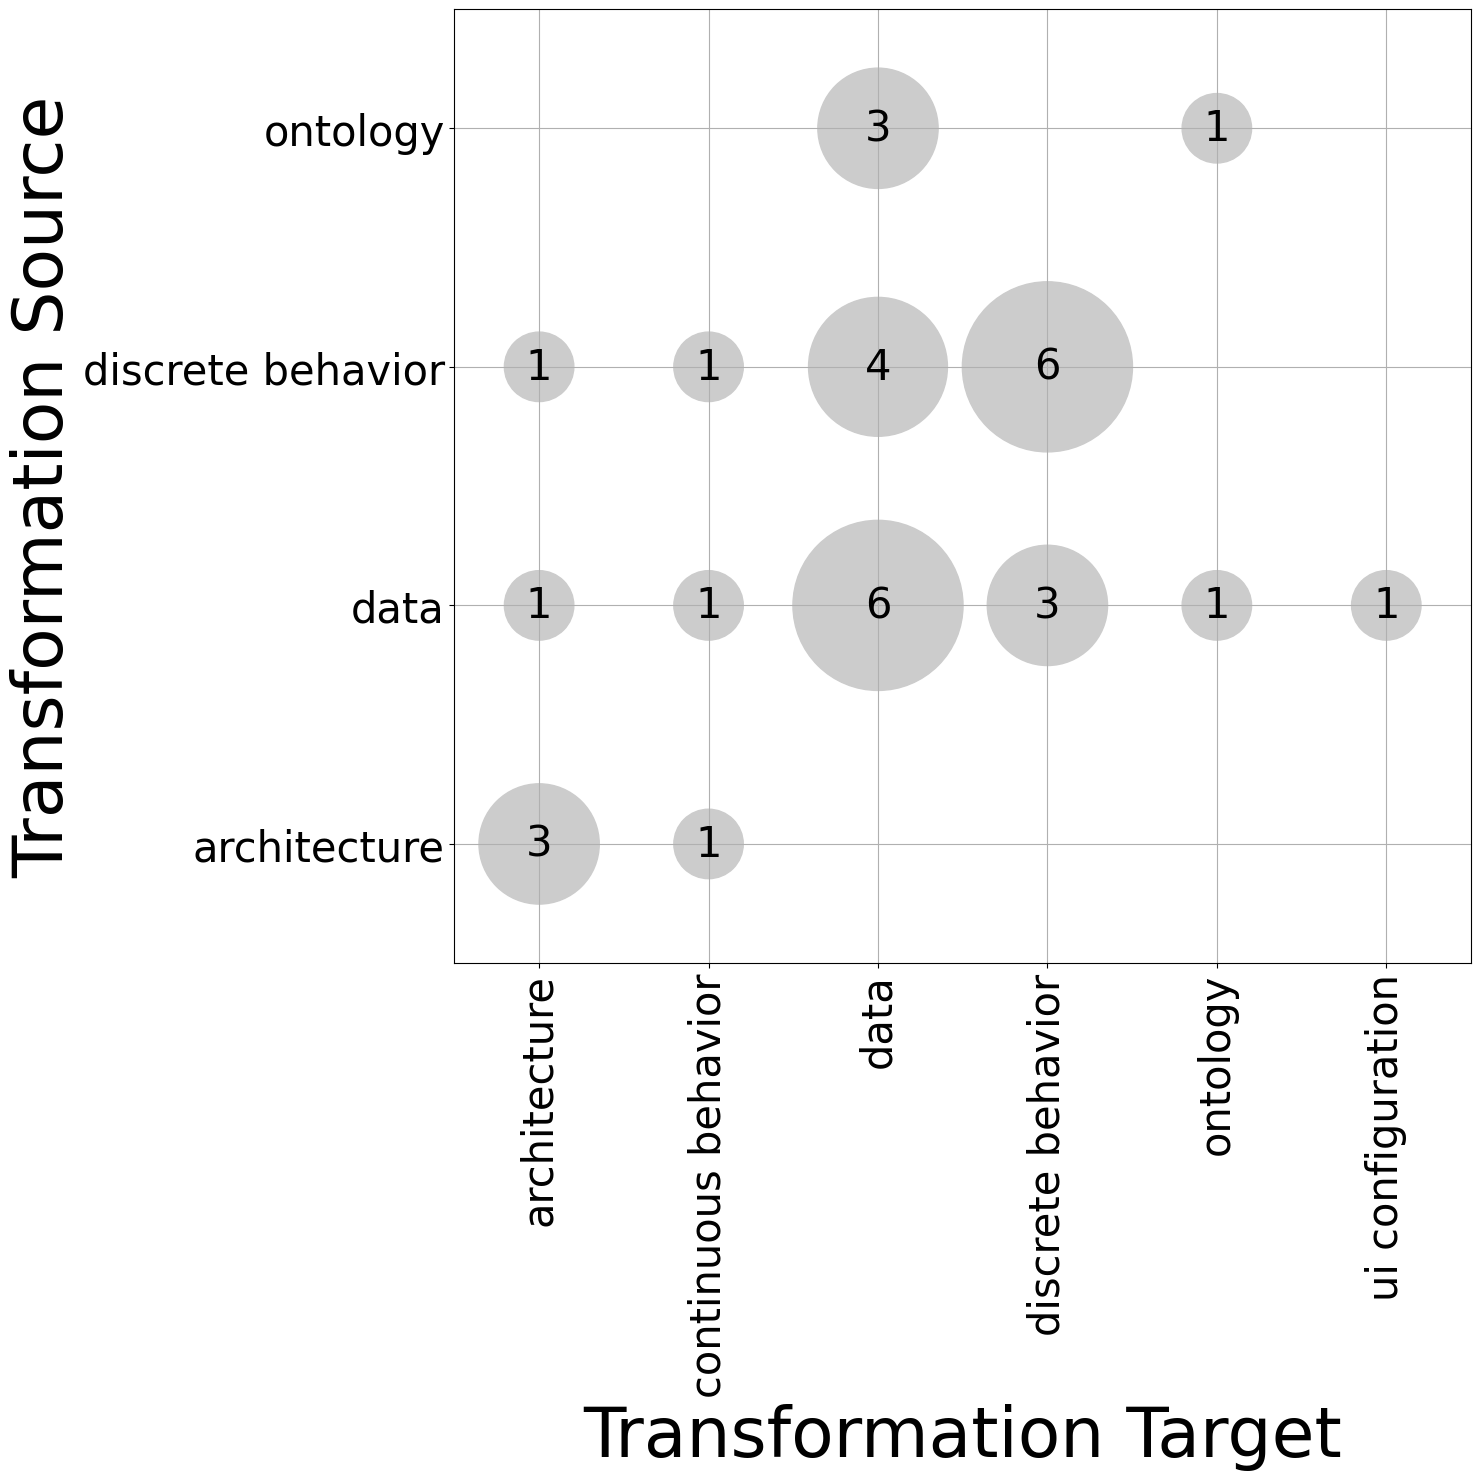

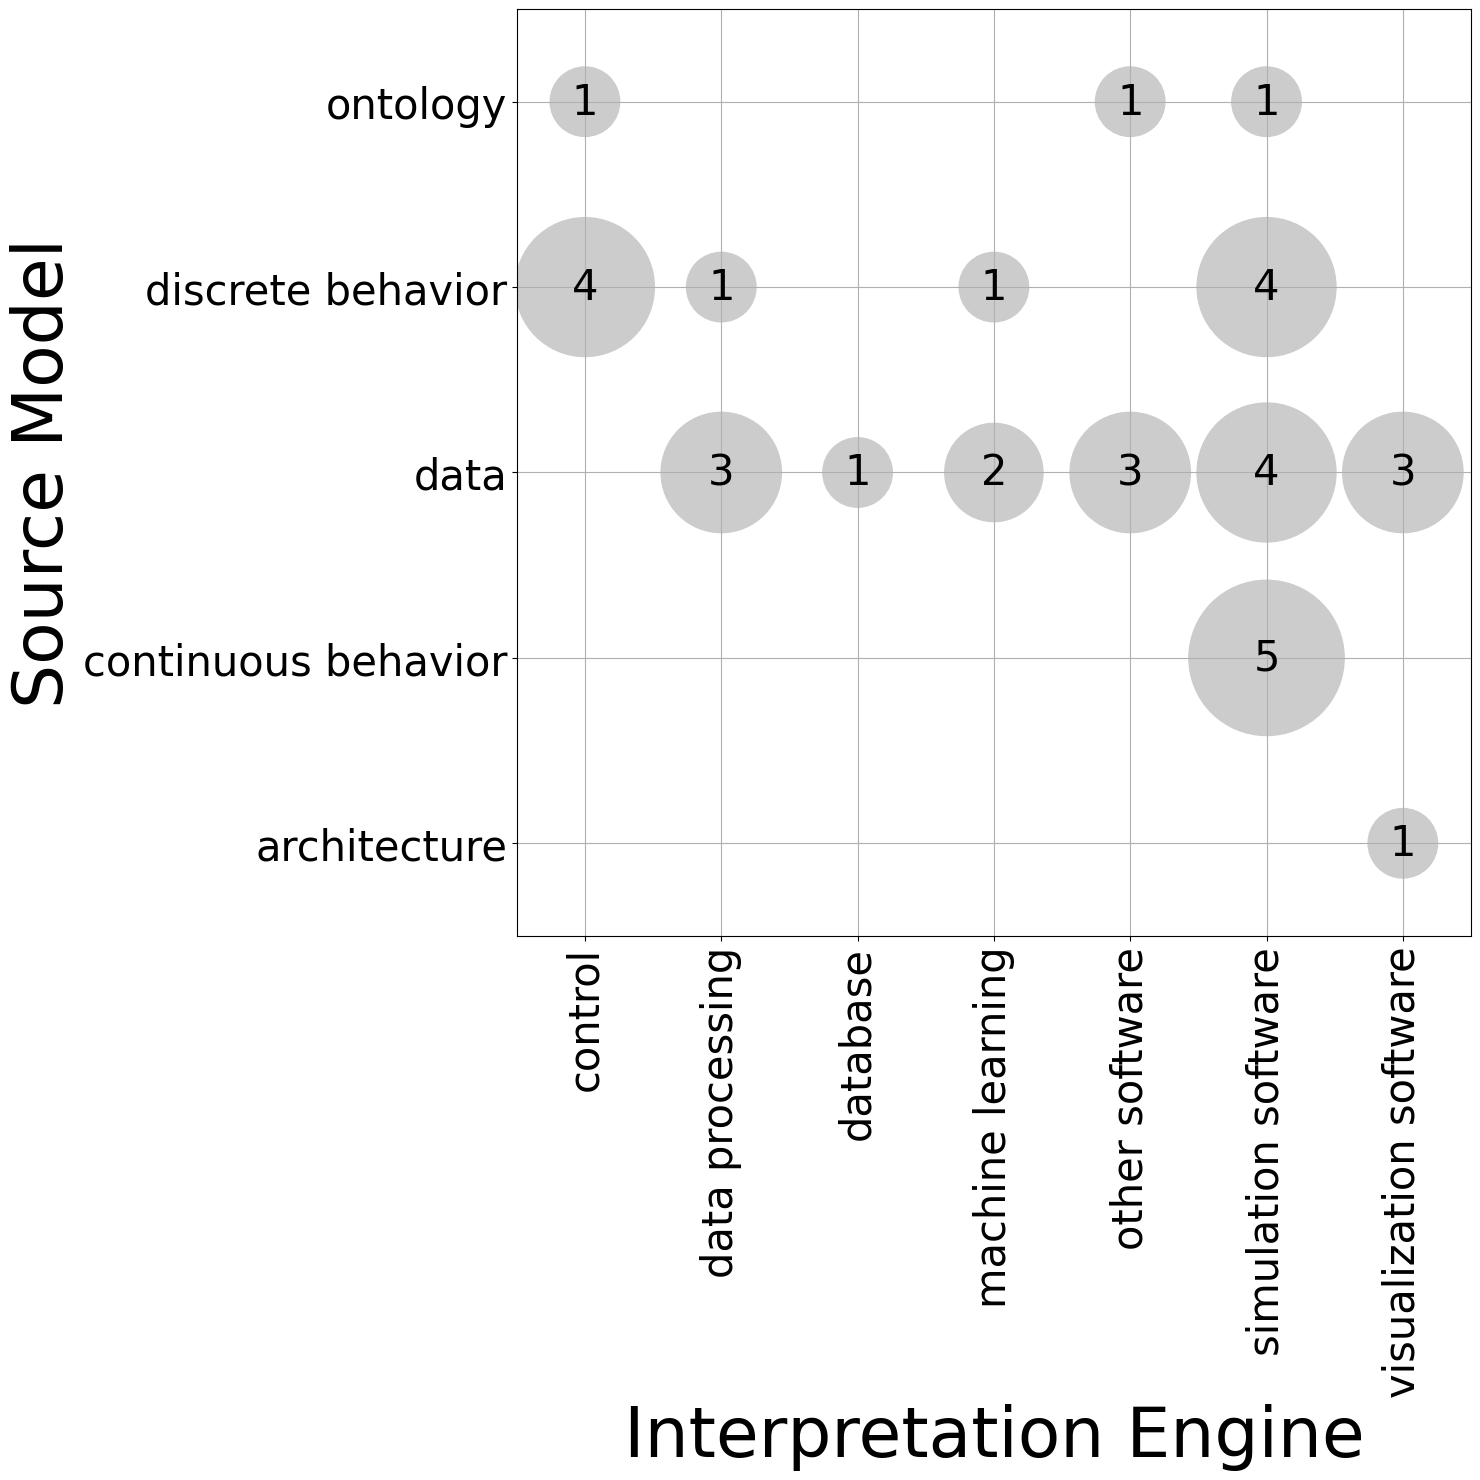

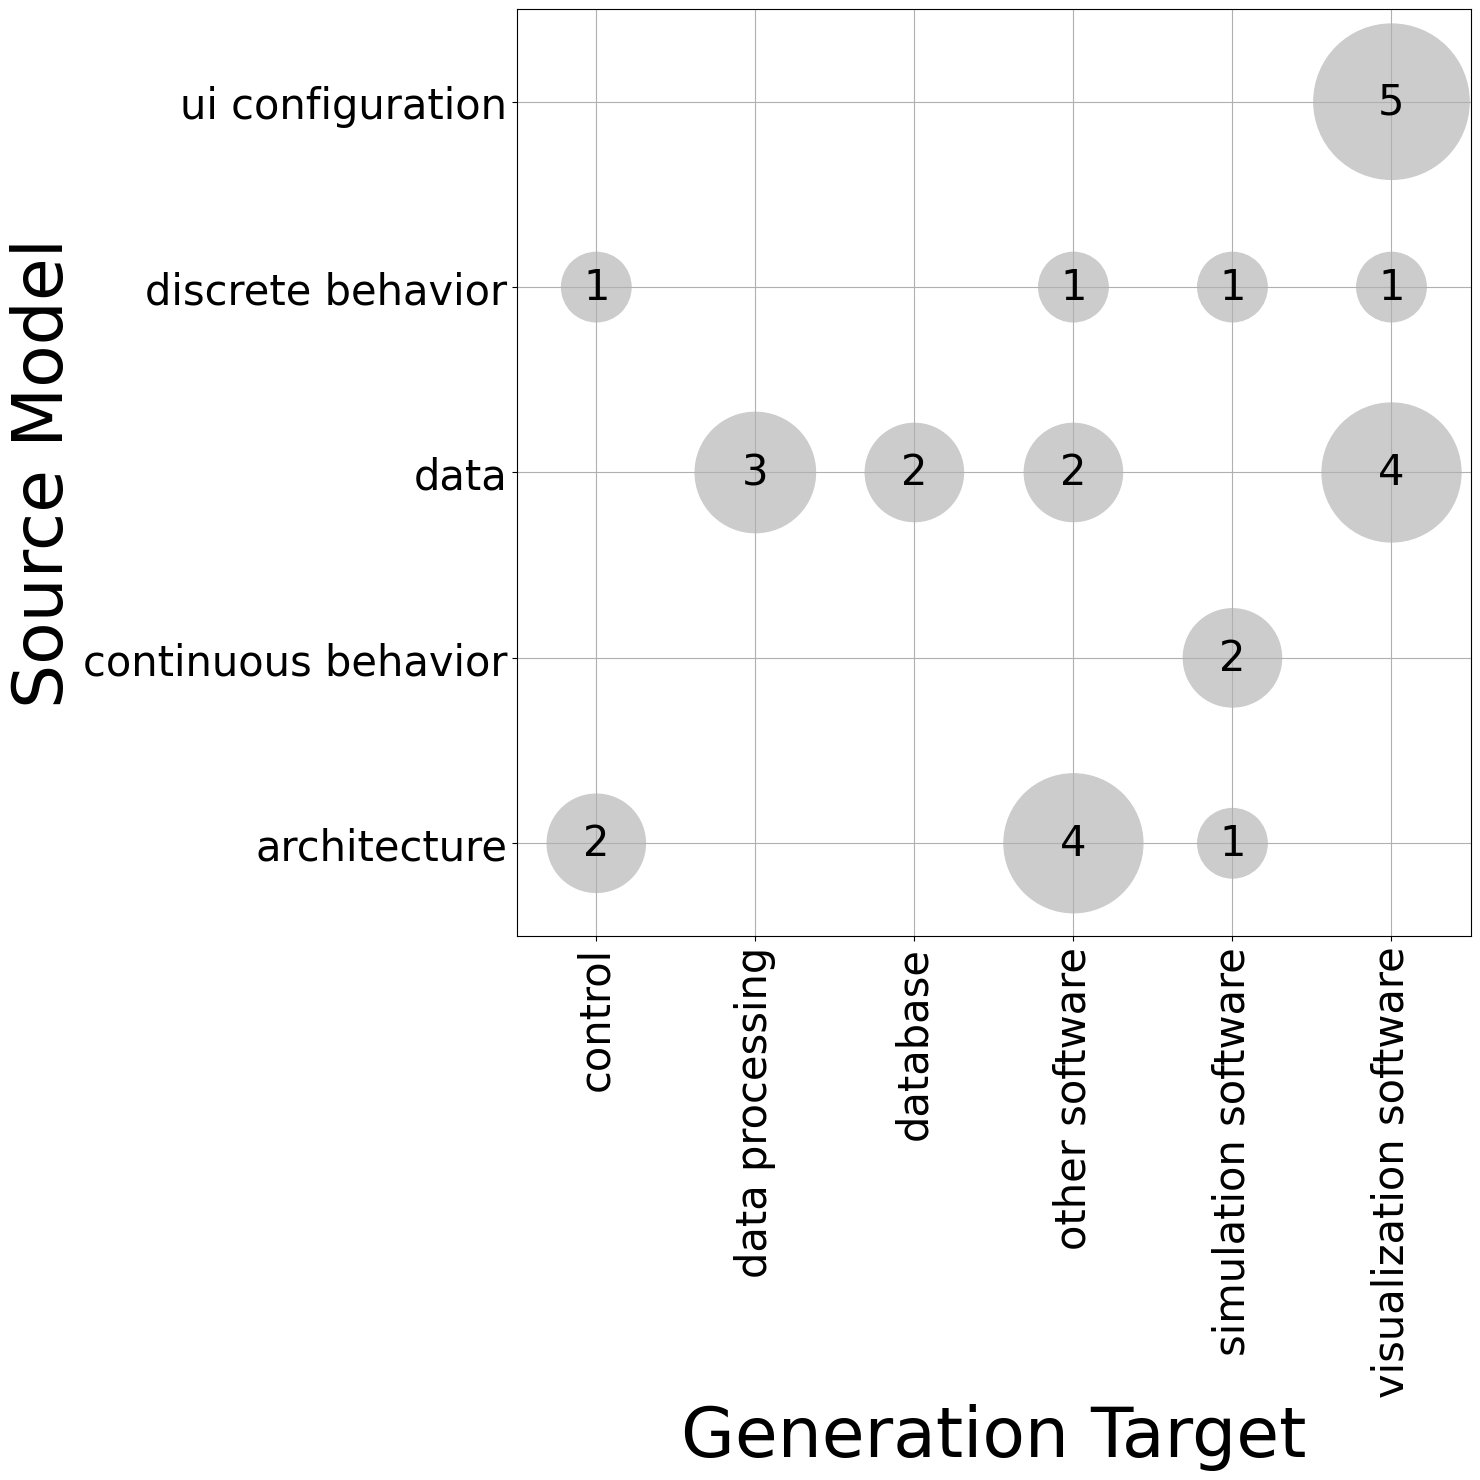

In [ ]:
source_target = pd.read_csv("./data/categorization_modeltomodel.csv", sep=";", header=0, index_col = 0)
source_target = source_target.transpose()
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(source_target)
plt.xlabel("Transformation Target", fontsize=50)
plt.ylabel("Transformation Source", fontsize=50)
plt.tight_layout()
plt.xlim(0.5, 6.5)
plt.ylim(0.5, 4.5)
plt.savefig(destination_folder + "mde_modeltomodel_scatter.pdf")

source_target = pd.read_csv("./data/categorization_modelinterpretation.csv", sep=";", header=0, index_col = 0)
source_target = source_target.transpose()
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(source_target)
plt.xlabel("Interpretation Engine", fontsize=50)
plt.ylabel("Source Model", fontsize=50)
plt.tight_layout()
plt.xlim(0.5, 7.5)
plt.ylim(0.5, 5.5)
plt.savefig(destination_folder + "mde_modelinterpretation_scatter.pdf")

source_target = pd.read_csv("./data/categorization_modeltotext.csv", sep=";", header=0, index_col = 0)
source_target = source_target.transpose()
plt.figure(figsize=(15,15))
size_multiplier = 2500
scatter_for_df(source_target)
plt.xlabel("Generation Target", fontsize=50)
plt.ylabel("Source Model", fontsize=50)
plt.tight_layout()
plt.xlim(0.5, 6.5)
plt.ylim(0.5, 5.5)
plt.savefig(destination_folder + "mde_modeltotext_scatter.pdf")

